# Hackaton Project #
## Project Description ##
**Goal:**
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

**Dataset:** 
The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

- Train_Data
- Test_Data

**Target Variable:** Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

**Data Dictionary:**
All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

**Submission File Format:** You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

- ID
- Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

**Evaluation Criteria:**

**Accuracy Score:** The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.
 
In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy is 0%.

## Data Dictionary ##
### Travel Data ###

| Column  | Description | Value Examples |
|----------|----------|----------|
| ID |The unique ID of the passenger |	Continuous values like 98800001, 98800002, etc.|
| Gender | The gender of the passenger |	"Male, Female" |
|Customer_Type	| Loyalty type of the passenger	"Loyal Customer", Disloyal Customer" |
|Age	| The age of the passenger	| Continuous values like 48, 52, 9, etc. |
|Type_Travel |	Purpose of travel for the passenger	| "Personal Travel, Business Travel" |
|Travel_Class |	The train class that the passenger traveled in |	"Business, Eco" |
|Travel_Distance |	The distance traveled by the passenger	| Continuous values like 272, 780, 853, etc. |
|Departure_Delay_in_Mins | The delay (in minutes) in train departure	| Continuous values like 9, 15, 13, etc. |
|Arrival_Delay_in_Mins | The delay (in minutes) in train arrival |	Continuous values like 0, 15, 18, etc. |

### Survey Data ###
| Column  | Description | Value Examples |
|----------|----------|----------|
|ID	| The unique ID of the passenger	| Continuous values like 98800001, 98800002, etc. |
|Platform_Location |	How convenient the location of the platform is for the passenger	| Very Inconvenient <br>Inconvenient <br>Needs Improvement <br>Manageable <br>Convenient <br>Very Convenient | 
|Seat_Class	| "The type of the seat class in the train. Green Car seats are usually more spacious and comfortable than ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car." | Ordinary<br>Green Car |
|Overall_Experience	| The overall experience of the passenger	| 1 - Satisfied <br> 0 - Not Satisfied |
|Seat_Comfort	| The comfort level of the seat for the passenger |	Extremely Poor <br> Poor <br>Needs Improvement <br>Acceptable <br>Good <br>Excellent |
|Arrival_Time_Convenient	| How convenient the arrival time of the train is for the passenger	| Extremely Poor<br> Poor <br>Needs <br>Improvement <br>Acceptable <br>Good <br>Excellent |
|Catering	| How convenient the catering service is for the passenger	| Extremely Poor <br>Poor <br>Needs Improvement <br>Acceptable <br>Good <br>Excellent |
|Onboard_Wifi_Service	| The quality of the onboard Wi-Fi service for the passenger |	Extremely Poor <br>Poor <br>Needs Improvement<br> Acceptable<br>Good<br>Excellent |
|Onboard_Entertainment |	The quality of the onboard entertainment for the passenger | Extremely Poor<br> Poor<br> Needs Improvement <br>Acceptable <br>Good <br>Excellent |
|Online_Support	| The quality of the online support for the passenger |	Extremely Poor <br>Poor <br>Needs Improvement <br>Acceptable <br>Good <br>Excellent |
|Ease_of_Online_Booking |	The ease of online booking for the passenger |	Extremely Poor<br> Poor<br> Needs Improvement <br>Acceptable <br>Good <br>Excellent |
|Onboard_Service |	The quality of the onboard service for the passenger |	Extremely Poor <br>Poor<br> Needs Improvement<br> Acceptable<br> Good <br> Excellent |
|Legroom |	Legroom is the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it. This variable describes the convenience of the legroom provided for the passenger | Extremely Poor<br> Poor <br>Needs Improvement <br>Acceptable <br>Good <br>Excellent |
|Baggage_Handling	| The convenience of baggage handling for the passenger	| Extremely Poor<br> Poor <br>Needs Improvement <br>Acceptable <br>Good<br> Excellent |
|CheckIn_Service	| The convenience of the check-in service for the passenger	| Extremely Poor<br> Poor<br> Needs Improvement<br> Acceptable<br> Good<br> Excellent |
|Cleanliness |	The passenger's view of the cleanliness of the service	| Extremely Poor<br> Poor<br> Needs Improvement<br> Acceptable<br> Good<br> Excellent|
|Online_Boarding |	The convenience of the online boarding process for the passenger |	Extremely Poor<br> Poor<br> Needs Improvement<br> Acceptable<br> Good<br> Excellent |

In [71]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd
import pandas.api.types as ptypes

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
travel_data = pd.read_csv("Traveldata_train.csv")

In [34]:
travel_data.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [36]:
survey_data = pd.read_csv("Surveydata_train.csv")
survey_data.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [40]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [42]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [44]:
train_data = pd.merge(travel_data, survey_data, on="ID")

In [46]:
train_data.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

   Overall_Experience  ... Onboard_Wifi_Service Onboard_Entertainment  \
0                   0  ...                 Good     Needs Improvement   
1                   0  ...                 Good                  Poor   
2                   1  ...    Needs Improvement                  Good   
3                   0  ...           Acceptable     Needs Improvement   
4                   1  ...    Needs Improvement                  Good   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0     Acceptable      Needs Improvement  Needs Improvement         Acceptable   
1           Good                   Good          Excellent  Needs Improvement   
2      Excellent              Excellent          Excellent          Excellent   
3     Acceptable             Acceptable         Acceptable         Acceptable   
4      Excellent                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good  

[5 rows x 25 columns]

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [55]:
train_data.shape

(94379, 25)

In [58]:
train_data.describe().T

count          mean           std         min  \
ID                       94379.0  9.884719e+07  27245.014865  98800001.0   
Age                      94346.0  3.941965e+01     15.116632         7.0   
Travel_Distance          94379.0  1.978888e+03   1027.961019        50.0   
Departure_Delay_in_Mins  94322.0  1.464709e+01     38.138781         0.0   
Arrival_Delay_in_Mins    94022.0  1.500522e+01     38.439409         0.0   
Overall_Experience       94379.0  5.466576e-01      0.497821         0.0   

                                25%         50%         75%         max  
ID                       98823595.5  98847190.0  98870784.5  98894379.0  
Age                            27.0        40.0        51.0        85.0  
Travel_Distance              1359.0      1923.0      2538.0      6951.0  
Departure_Delay_in_Mins         0.0         0.0        12.0      1592.0  
Arrival_Delay_in_Mins           0.0         0.0        13.0      1584.0  
Overall_Experience              0.0         1.0         1.0         1.0

In [61]:
train_data["Overall_Experience"].value_counts(normalize=True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

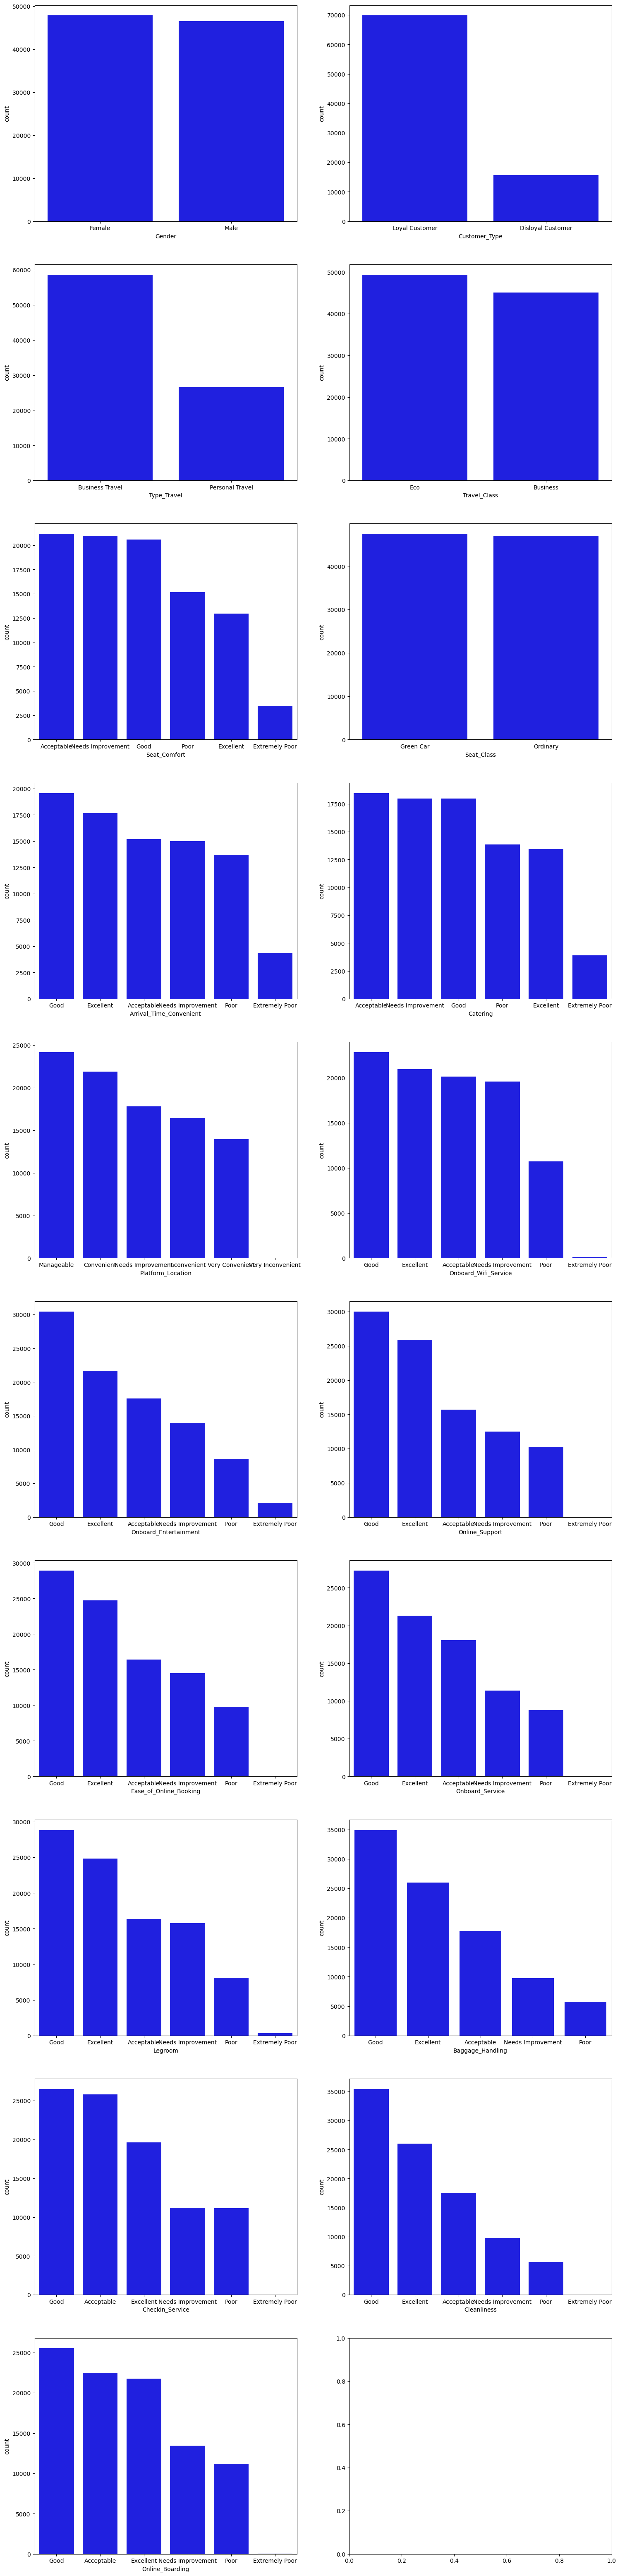

In [95]:
fig, axes = plt.subplots(10, 2, figsize = (18, 80))
i = 0
j = 0
for c in train_data.columns:
    if not ptypes.is_numeric_dtype(train_data[c]):
        #print(train_data[c].value_counts())
        sns.countplot(ax = axes[i, j], x = c, data = train_data, color = 'blue',
              order = train_data[c].value_counts().index);
        j +=1
        if j==2:
            i+=1
            j=0
        

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10))
sns.histplot(x='age', data=data, kde = True, ax=axes[0,0])

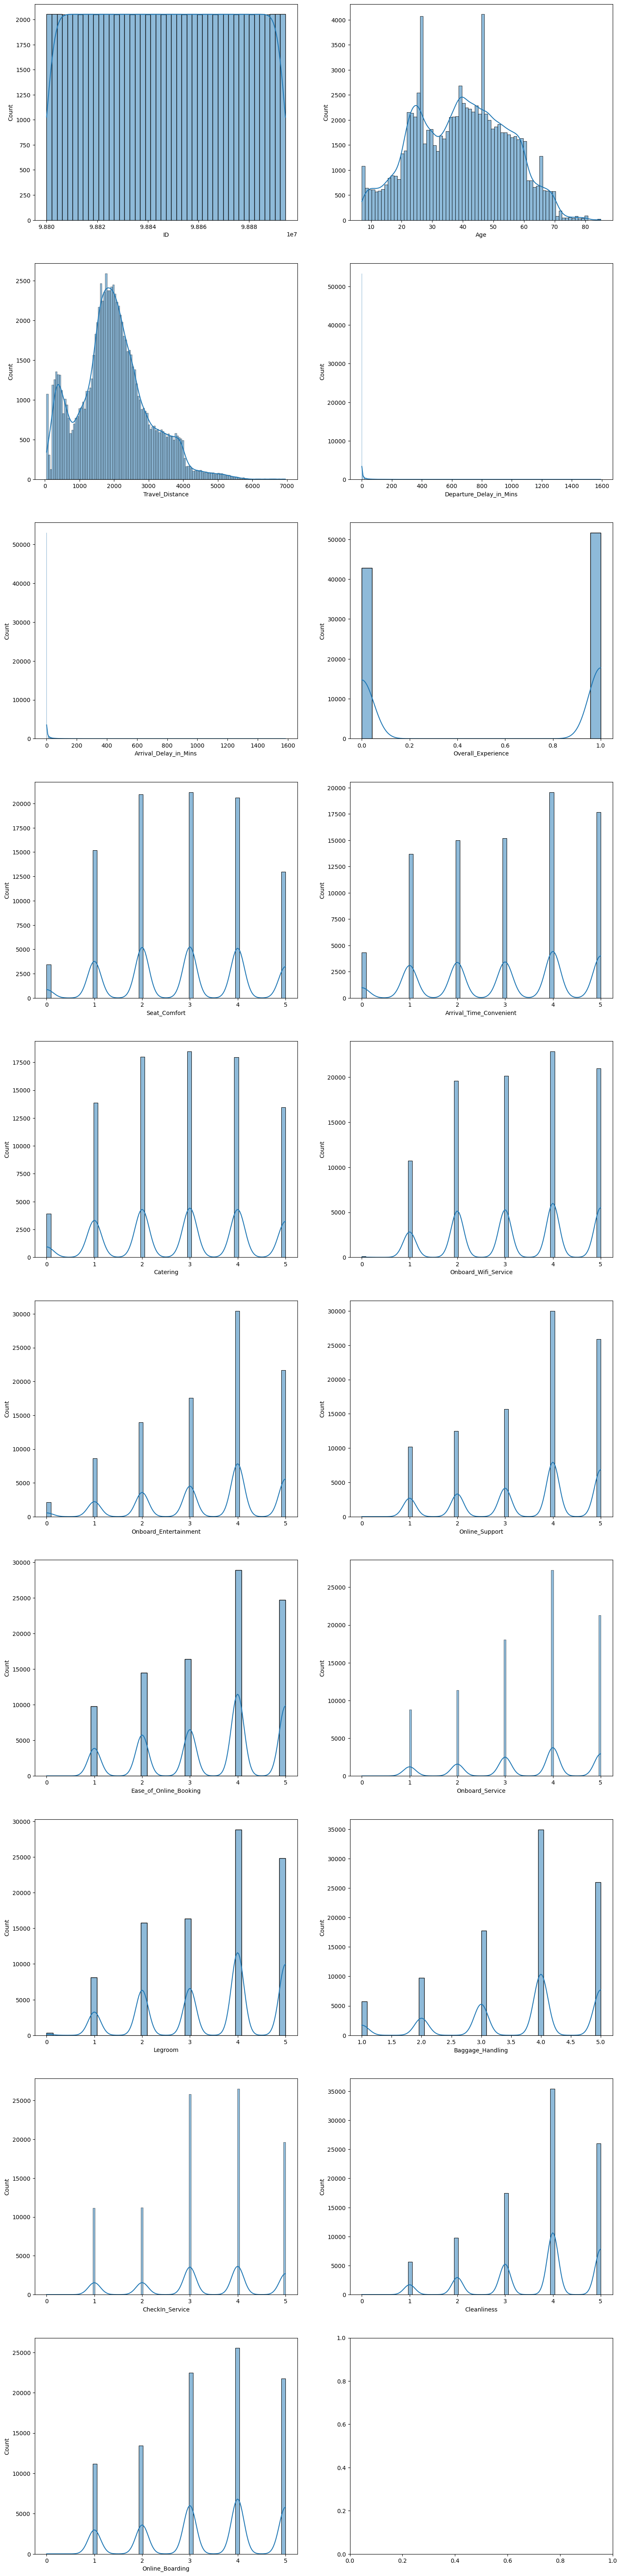

In [143]:
fig, axes = plt.subplots(10, 2, figsize = (18, 80))
i = 0
j = 0
for c in train_data.columns:
    if ptypes.is_numeric_dtype(train_data[c]):
        #print(train_data[c].value_counts())
        sns.histplot(x=c, data=train_data, kde = True, ax=axes[i,j])
        j +=1
        if j==2:
            i+=1
            j=0

In [145]:
def boxplot_numerical_vars(df):
    fig, axes = plt.subplots(10, 2, figsize = (18, 80))
    i = 0
    j = 0
    for c in df.columns:
        if ptypes.is_numeric_dtype(df[c]):
            #print(train_data[c].value_counts())
            sns.boxplot(x=c, data=df, ax=axes[i,j])
            j +=1
            if j==2:
                i+=1
                j=0

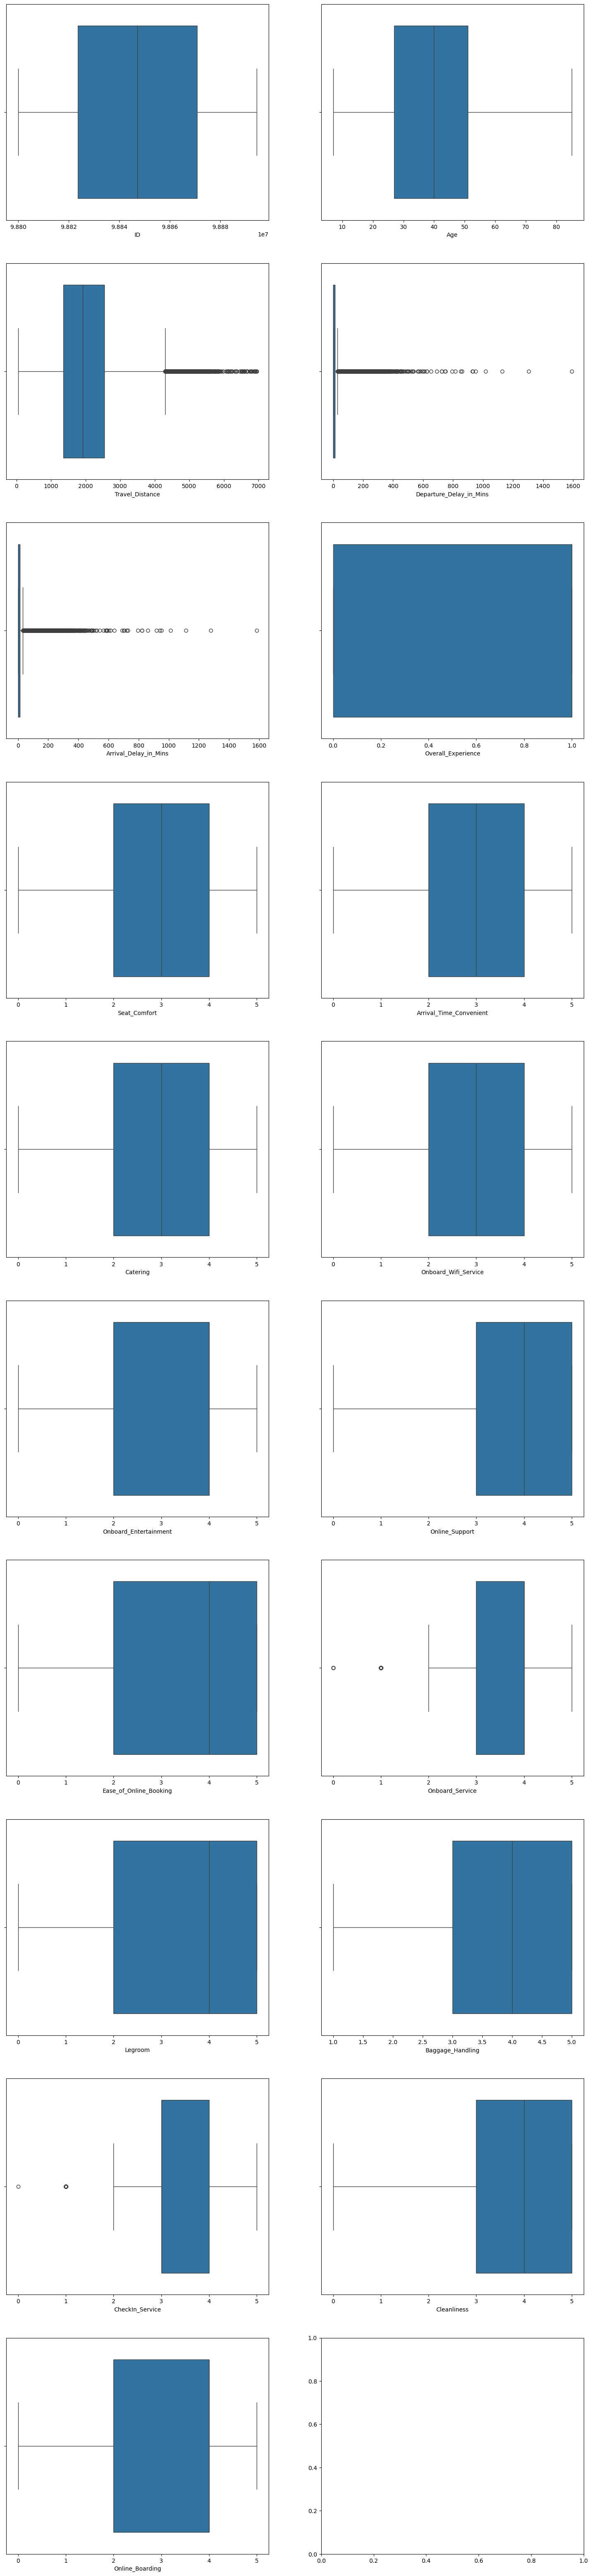

In [147]:
boxplot_numerical_vars(train_data)

In [117]:
import matplotlib as mpl
from matplotlib	import pyplot as plt

def scatter_plot(true_df, false_df, variable):
    true = true_df[variable].value_counts() #failures.groupby('X')
    false = false_df[variable].value_counts()
    plt.scatter(true.index, true, c='blue', s=40)
    plt.scatter(false.index, false, c='red', s=40)
    plt.xlabel(variable)
    plt.ylabel('Passengers')
    plt.legend(['Satisfied', 'Not Satisfied'])
    plt.show()

In [121]:
satisfied = train_data.loc[(train_data["Overall_Experience"] == 1)]
not_satisfied	= train_data.loc[(train_data["Overall_Experience"] == 0)]

In [131]:
for c in train_data.columns:
    if not ptypes.is_numeric_dtype(train_data[c]):
        #print(train_data[c].value_counts())
        train_data[c].replace("Extremely Poor", 0, inplace=True)
        train_data[c].replace("Poor", 1, inplace=True)
        train_data[c].replace("Needs Improvement", 2, inplace=True)
        train_data[c].replace("Acceptable", 3, inplace=True)
        train_data[c].replace("Good", 4, inplace=True)
        train_data[c].replace("Excellent", 5, inplace=True)

#Extremely Poor
#Poor
#Needs Improvement
#Acceptable
#Good
#Excellent

In [133]:
train_data.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

   Overall_Experience  ...  Onboard_Wifi_Service Onboard_Entertainment  \
0                   0  ...                   4.0                   2.0   
1                   0  ...                   4.0                   1.0   
2                   1  ...                   2.0                   4.0   
3                   0  ...                   3.0                   2.0   
4                   1  ...                   2.0                   4.0   

   Online_Support  Ease_of_Online_Booking Onboard_Service  Legroom  \
0             3.0                     2.0             2.0      3.0   
1             4.0                     4.0             5.0      2.0   
2             5.0                     5.0             5.0      5.0   
3             3.0                     3.0             3.0      3.0   
4             5.0                     4.0             4.0      4.0   

   Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  
0               2.0              4.0          2.0              1.0  
1               1.0              2.0          4.0              4.0  
2               5.0              4.0          5.0              5.0  
3               3.0              4.0          3.0              3.0  
4               4.0              4.0          4.0              4.0  

[5 rows x 25 columns]

In [151]:
#Very Inconvenient
#Inconvenient
#Needs Improvement
#Manageable
#Convenient
#Very Convenient

train_data["Platform_Location"].replace("Very Inconvenient", 0, inplace=True)
train_data["Platform_Location"].replace("Inconvenient", 1, inplace=True)
train_data["Platform_Location"].replace("Needs Improvement", 2, inplace=True)
train_data["Platform_Location"].replace("Manageable", 3, inplace=True)
train_data["Platform_Location"].replace("Convenient", 4, inplace=True)
train_data["Platform_Location"].replace("Very Convenient", 5, inplace=True)

In [153]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  float64
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  float64
 13  Catering                 85638 non-null  float64
 14  Platform_Location     

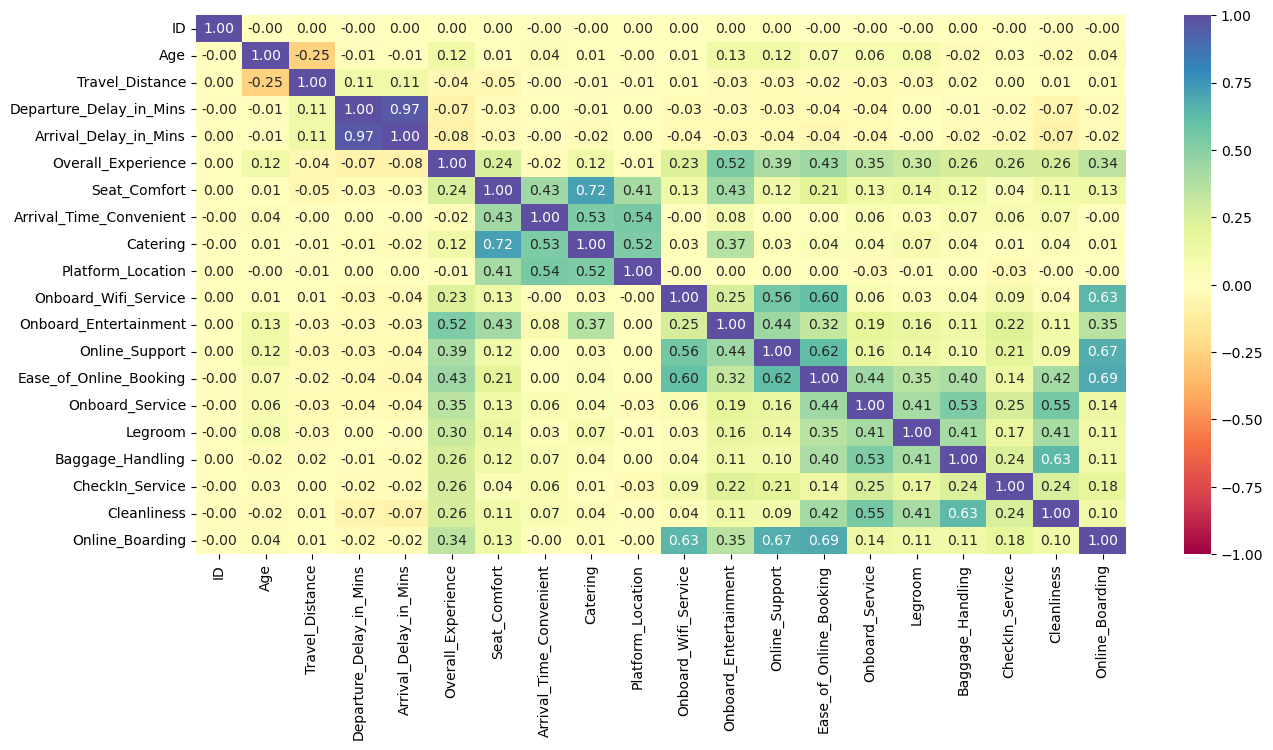

In [156]:
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [165]:
# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
(
    (train_data.select_dtypes(include=["float64", "int64"]) < lower)
    | (train_data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(train_data) * 100

ID                          0.000000
Age                         0.000000
Travel_Distance             2.041768
Departure_Delay_in_Mins    13.907755
Arrival_Delay_in_Mins      13.392810
Overall_Experience          0.000000
Seat_Comfort                0.000000
Arrival_Time_Convenient     0.000000
Catering                    0.000000
Platform_Location           0.000000
Onboard_Wifi_Service        0.000000
Onboard_Entertainment       0.000000
Online_Support              0.000000
Ease_of_Online_Booking      0.000000
Onboard_Service             9.302917
Legroom                     0.000000
Baggage_Handling            0.000000
CheckIn_Service            11.801354
Cleanliness                 0.000000
Online_Boarding             0.000000
dtype: float64

In [1234]:
train_data.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [1236]:
X = train_data.drop(["ID", "Overall_Experience"], axis=1)

In [1238]:
y = train_data["Overall_Experience"]

In [1240]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [1242]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   66012 non-null  object 
 1   Customer_Type            59802 non-null  object 
 2   Age                      66043 non-null  float64
 3   Type_Travel              59649 non-null  object 
 4   Travel_Class             66065 non-null  object 
 5   Travel_Distance          66065 non-null  int64  
 6   Departure_Delay_in_Mins  66020 non-null  float64
 7   Arrival_Delay_in_Mins    65799 non-null  float64
 8   Seat_Comfort             66019 non-null  float64
 9   Seat_Class               66065 non-null  object 
 10  Arrival_Time_Convenient  59814 non-null  float64
 11  Catering                 60026 non-null  float64
 12  Platform_Location        66049 non-null  float64
 13  Onboard_Wifi_Service     66049 non-null  float64
 14  Onboard_Entertainm

In [1245]:
X_train.isna().sum()

Gender                       53
Customer_Type              6263
Age                          22
Type_Travel                6416
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      45
Arrival_Delay_in_Mins       266
Seat_Comfort                 46
Seat_Class                    0
Arrival_Time_Convenient    6251
Catering                   6039
Platform_Location            16
Onboard_Wifi_Service         16
Onboard_Entertainment        11
Online_Support               62
Ease_of_Online_Booking       51
Onboard_Service            5291
Legroom                      69
Baggage_Handling            104
CheckIn_Service              54
Cleanliness                   5
Online_Boarding               5
dtype: int64

In [1247]:
X_train.columns[X_train.notna().all()]

Index(['Travel_Class', 'Travel_Distance', 'Seat_Class'], dtype='object')

In [1249]:

categ_columns = []
for c in X_train.columns:
    if c not in ['Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Travel_Class', 'Seat_Class']:
        categ_columns.append(c)
categ_columns

['Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [1251]:
X_train.head()

Gender      Customer_Type   Age      Type_Travel Travel_Class  \
90112    Male     Loyal Customer  49.0  Business Travel     Business   
54258  Female     Loyal Customer  45.0  Business Travel     Business   
58136    Male     Loyal Customer  25.0              NaN     Business   
23288  Female  Disloyal Customer  21.0  Business Travel          Eco   
31834    Male  Disloyal Customer  35.0              NaN     Business   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
90112             2023                     64.0                   56.0   
54258             4879                    160.0                  146.0   
58136             3779                      0.0                    0.0   
23288             1928                      0.0                   20.0   
31834             2331                      2.0                    1.0   

       Seat_Comfort Seat_Class  ...  Onboard_Wifi_Service  \
90112           1.0   Ordinary  ...                   4.0   
54258           3.0  Green Car  ...                   3.0   
58136           3.0   Ordinary  ...                   3.0   
23288           5.0  Green Car  ...                   2.0   
31834           2.0   Ordinary  ...                   5.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
90112                    4.0             5.0                     5.0   
54258                    3.0             3.0                     1.0   
58136                    3.0             3.0                     3.0   
23288                    5.0             2.0                     2.0   
31834                    2.0             5.0                     5.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
90112              5.0      5.0               5.0              5.0   
54258              1.0      3.0               3.0              3.0   
58136              4.0      5.0               3.0              2.0   
23288              3.0      1.0               4.0              3.0   
31834              3.0      3.0               3.0              3.0   

       Cleanliness  Online_Boarding  
90112          5.0              5.0  
54258          4.0              3.0  
58136          3.0              3.0  
23288          1.0              2.0  
31834          3.0              5.0  

[5 rows x 23 columns]

In [1253]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define Imputers
median_imputer = SimpleImputer(strategy='constant', fill_value=0)
mode_imputer = SimpleImputer(strategy='most_frequent')
# Fit and transform the train data
X_train[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']] = median_imputer.fit_transform(X_train[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']])

X_train.head()
# Transform the test data
#X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

Gender      Customer_Type   Age      Type_Travel Travel_Class  \
90112    Male     Loyal Customer  49.0  Business Travel     Business   
54258  Female     Loyal Customer  45.0  Business Travel     Business   
58136    Male     Loyal Customer  25.0              NaN     Business   
23288  Female  Disloyal Customer  21.0  Business Travel          Eco   
31834    Male  Disloyal Customer  35.0              NaN     Business   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
90112             2023                     64.0                   56.0   
54258             4879                    160.0                  146.0   
58136             3779                      0.0                    0.0   
23288             1928                      0.0                   20.0   
31834             2331                      2.0                    1.0   

       Seat_Comfort Seat_Class  ...  Onboard_Wifi_Service  \
90112           1.0   Ordinary  ...                   4.0   
54258           3.0  Green Car  ...                   3.0   
58136           3.0   Ordinary  ...                   3.0   
23288           5.0  Green Car  ...                   2.0   
31834           2.0   Ordinary  ...                   5.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
90112                    4.0             5.0                     5.0   
54258                    3.0             3.0                     1.0   
58136                    3.0             3.0                     3.0   
23288                    5.0             2.0                     2.0   
31834                    2.0             5.0                     5.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
90112              5.0      5.0               5.0              5.0   
54258              1.0      3.0               3.0              3.0   
58136              4.0      5.0               3.0              2.0   
23288              3.0      1.0               4.0              3.0   
31834              3.0      3.0               3.0              3.0   

       Cleanliness  Online_Boarding  
90112          5.0              5.0  
54258          4.0              3.0  
58136          3.0              3.0  
23288          1.0              2.0  
31834          3.0              5.0  

[5 rows x 23 columns]

In [1255]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   66012 non-null  object 
 1   Customer_Type            59802 non-null  object 
 2   Age                      66043 non-null  float64
 3   Type_Travel              59649 non-null  object 
 4   Travel_Class             66065 non-null  object 
 5   Travel_Distance          66065 non-null  int64  
 6   Departure_Delay_in_Mins  66065 non-null  float64
 7   Arrival_Delay_in_Mins    66065 non-null  float64
 8   Seat_Comfort             66019 non-null  float64
 9   Seat_Class               66065 non-null  object 
 10  Arrival_Time_Convenient  59814 non-null  float64
 11  Catering                 60026 non-null  float64
 12  Platform_Location        66049 non-null  float64
 13  Onboard_Wifi_Service     66049 non-null  float64
 14  Onboard_Entertainm

In [1257]:
non_num_columns = []
for c in categ_columns:
    if not ptypes.is_numeric_dtype(X_train[c]):
        non_num_columns.append(c)
non_num_columns

['Gender', 'Customer_Type', 'Type_Travel']

In [1259]:
X_train[non_num_columns] = mode_imputer.fit_transform(X_train[non_num_columns])

In [1261]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   66065 non-null  object 
 1   Customer_Type            66065 non-null  object 
 2   Age                      66043 non-null  float64
 3   Type_Travel              66065 non-null  object 
 4   Travel_Class             66065 non-null  object 
 5   Travel_Distance          66065 non-null  int64  
 6   Departure_Delay_in_Mins  66065 non-null  float64
 7   Arrival_Delay_in_Mins    66065 non-null  float64
 8   Seat_Comfort             66019 non-null  float64
 9   Seat_Class               66065 non-null  object 
 10  Arrival_Time_Convenient  59814 non-null  float64
 11  Catering                 60026 non-null  float64
 12  Platform_Location        66049 non-null  float64
 13  Onboard_Wifi_Service     66049 non-null  float64
 14  Onboard_Entertainm

In [1263]:
num_columns = []
for c in categ_columns:
    if ptypes.is_numeric_dtype(X_train[c]):
        num_columns.append(c)
num_columns

['Age',
 'Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [1265]:
X_train[num_columns] = mode_imputer.fit_transform(X_train[num_columns])

In [1267]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   66065 non-null  object 
 1   Customer_Type            66065 non-null  object 
 2   Age                      66065 non-null  float64
 3   Type_Travel              66065 non-null  object 
 4   Travel_Class             66065 non-null  object 
 5   Travel_Distance          66065 non-null  int64  
 6   Departure_Delay_in_Mins  66065 non-null  float64
 7   Arrival_Delay_in_Mins    66065 non-null  float64
 8   Seat_Comfort             66065 non-null  float64
 9   Seat_Class               66065 non-null  object 
 10  Arrival_Time_Convenient  66065 non-null  float64
 11  Catering                 66065 non-null  float64
 12  Platform_Location        66065 non-null  float64
 13  Onboard_Wifi_Service     66065 non-null  float64
 14  Onboard_Entertainm

In [1269]:
X_test[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']] = median_imputer.fit_transform(X_test[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']])
X_test[non_num_columns] = mode_imputer.fit_transform(X_test[non_num_columns])
X_test[num_columns] = mode_imputer.fit_transform(X_test[num_columns])


X_test.head()

Gender      Customer_Type   Age      Type_Travel Travel_Class  \
81488  Female     Loyal Customer  18.0  Personal Travel          Eco   
64933  Female     Loyal Customer  28.0  Business Travel     Business   
6048   Female     Loyal Customer  39.0  Business Travel     Business   
54498  Female     Loyal Customer  32.0  Personal Travel          Eco   
45386    Male  Disloyal Customer  40.0  Business Travel     Business   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
81488             1772                     18.0                   28.0   
64933             5128                      0.0                    0.0   
6048              3187                      0.0                    0.0   
54498             2543                      0.0                    0.0   
45386             1541                      4.0                    0.0   

       Seat_Comfort Seat_Class  ...  Onboard_Wifi_Service  \
81488           3.0   Ordinary  ...                   4.0   
64933           0.0  Green Car  ...                   5.0   
6048            1.0   Ordinary  ...                   5.0   
54498           1.0  Green Car  ...                   5.0   
45386           1.0   Ordinary  ...                   2.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
81488                    5.0             5.0                     5.0   
64933                    5.0             5.0                     5.0   
6048                     5.0             5.0                     4.0   
54498                    4.0             5.0                     4.0   
45386                    1.0             2.0                     2.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
81488              5.0      5.0               5.0              5.0   
64933              1.0      3.0               5.0              2.0   
6048               4.0      4.0               4.0              5.0   
54498              4.0      4.0               4.0              4.0   
45386              3.0      3.0               5.0              5.0   

       Cleanliness  Online_Boarding  
81488          5.0              4.0  
64933          5.0              5.0  
6048           4.0              4.0  
54498          4.0              4.0  
45386          4.0              2.0  

[5 rows x 23 columns]

In [1271]:

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28314 entries, 81488 to 42255
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   28314 non-null  object 
 1   Customer_Type            28314 non-null  object 
 2   Age                      28314 non-null  float64
 3   Type_Travel              28314 non-null  object 
 4   Travel_Class             28314 non-null  object 
 5   Travel_Distance          28314 non-null  int64  
 6   Departure_Delay_in_Mins  28314 non-null  float64
 7   Arrival_Delay_in_Mins    28314 non-null  float64
 8   Seat_Comfort             28314 non-null  float64
 9   Seat_Class               28314 non-null  object 
 10  Arrival_Time_Convenient  28314 non-null  float64
 11  Catering                 28314 non-null  float64
 12  Platform_Location        28314 non-null  float64
 13  Onboard_Wifi_Service     28314 non-null  float64
 14  Onboard_Entertainm

In [1273]:
dummy_columns = []
for c in X_train.columns:
    if not ptypes.is_numeric_dtype(X_train[c]):
        dummy_columns.append(c)

dummy_columns

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

In [1275]:
X_train = pd.get_dummies(X_train, drop_first=True, columns = dummy_columns)
X_test = pd.get_dummies(X_test, drop_first=True, columns=dummy_columns)

In [1277]:
X_train.head()

Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
90112  49.0             2023                     64.0                   56.0   
54258  45.0             4879                    160.0                  146.0   
58136  25.0             3779                      0.0                    0.0   
23288  21.0             1928                      0.0                   20.0   
31834  35.0             2331                      2.0                    1.0   

       Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
90112           1.0                      1.0       2.0                1.0   
54258           3.0                      5.0       5.0                5.0   
58136           3.0                      1.0       1.0                1.0   
23288           5.0                      5.0       5.0                4.0   
31834           2.0                      2.0       2.0                3.0   

       Onboard_Wifi_Service  Onboard_Entertainment  ...  Legroom  \
90112                   4.0                    4.0  ...      5.0   
54258                   3.0                    3.0  ...      3.0   
58136                   3.0                    3.0  ...      5.0   
23288                   2.0                    5.0  ...      1.0   
31834                   5.0                    2.0  ...      3.0   

       Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  \
90112               5.0              5.0          5.0              5.0   
54258               3.0              3.0          4.0              3.0   
58136               3.0              2.0          3.0              3.0   
23288               4.0              3.0          1.0              2.0   
31834               3.0              3.0          3.0              5.0   

       Gender_Male  Customer_Type_Loyal Customer  Type_Travel_Personal Travel  \
90112            1                             1                            0   
54258            0                             1                            0   
58136            1                             1                            0   
23288            0                             0                            0   
31834            1                             0                            0   

       Travel_Class_Eco  Seat_Class_Ordinary  
90112                 0                    1  
54258                 0                    0  
58136                 0                    1  
23288                 1                    0  
31834                 0                    1  

[5 rows x 23 columns]

In [1279]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           66065 non-null  float64
 1   Travel_Distance               66065 non-null  int64  
 2   Departure_Delay_in_Mins       66065 non-null  float64
 3   Arrival_Delay_in_Mins         66065 non-null  float64
 4   Seat_Comfort                  66065 non-null  float64
 5   Arrival_Time_Convenient       66065 non-null  float64
 6   Catering                      66065 non-null  float64
 7   Platform_Location             66065 non-null  float64
 8   Onboard_Wifi_Service          66065 non-null  float64
 9   Onboard_Entertainment         66065 non-null  float64
 10  Online_Support                66065 non-null  float64
 11  Ease_of_Online_Booking        66065 non-null  float64
 12  Onboard_Service               66065 non-null  float64
 1

In [490]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Unsatisfied', 'Satisified'], yticklabels=['Unsatisfied', 'Satisified'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [492]:
# To build classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV

In [494]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [496]:
y_train.value_counts()

1    36115
0    29950
Name: Overall_Experience, dtype: int64

In [498]:
y_pred_train = lg.predict(X_train)



              precision    recall  f1-score   support

           0       0.75      0.65      0.69     29950
           1       0.74      0.82      0.78     36115

    accuracy                           0.74     66065
   macro avg       0.74      0.73      0.73     66065
weighted avg       0.74      0.74      0.74     66065



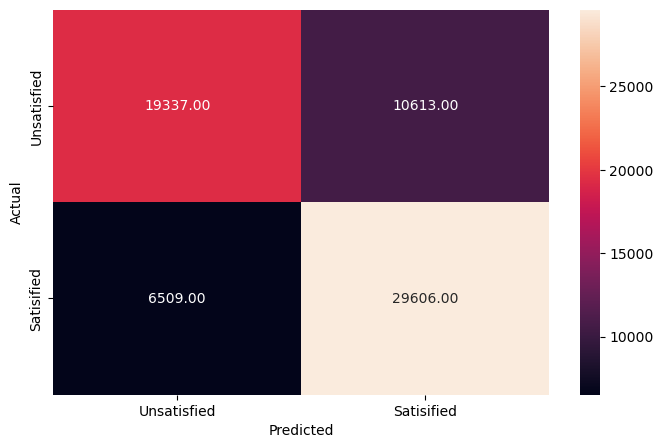

In [500]:
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.74      0.64      0.69     12836
           1       0.73      0.82      0.77     15478

    accuracy                           0.74     28314
   macro avg       0.74      0.73      0.73     28314
weighted avg       0.74      0.74      0.73     28314



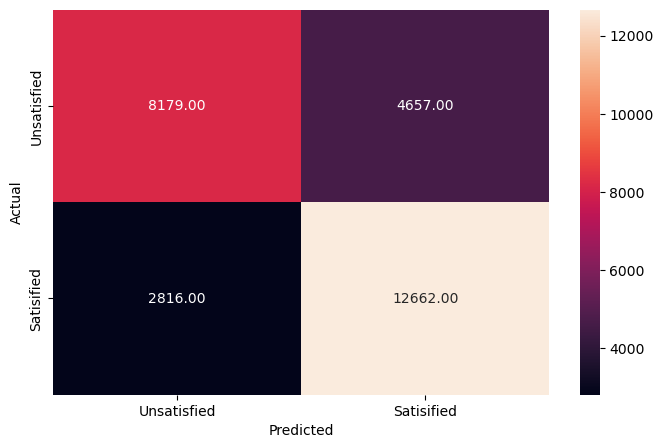

In [505]:
y_pred_test = lg.predict(X_test)

metrics_score(y_test, y_pred_test)

In [508]:
cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

0
Onboard_Entertainment         0.489053
Ease_of_Online_Booking        0.227382
Online_Support                0.190245
Onboard_Service               0.113320
Legroom                       0.112913
Online_Boarding               0.111736
Seat_Comfort                  0.083767
Customer_Type_Loyal Customer  0.069518
CheckIn_Service               0.066440
Departure_Delay_in_Mins       0.001882
Travel_Distance              -0.000395
Arrival_Delay_in_Mins        -0.006914
Age                          -0.019843
Baggage_Handling             -0.030579
Onboard_Wifi_Service         -0.040512
Seat_Class_Ordinary          -0.040798
Cleanliness                  -0.046532
Catering                     -0.095143
Type_Travel_Personal Travel  -0.098034
Gender_Male                  -0.159715
Travel_Class_Eco             -0.259689
Platform_Location            -0.273245
Arrival_Time_Convenient      -0.297765

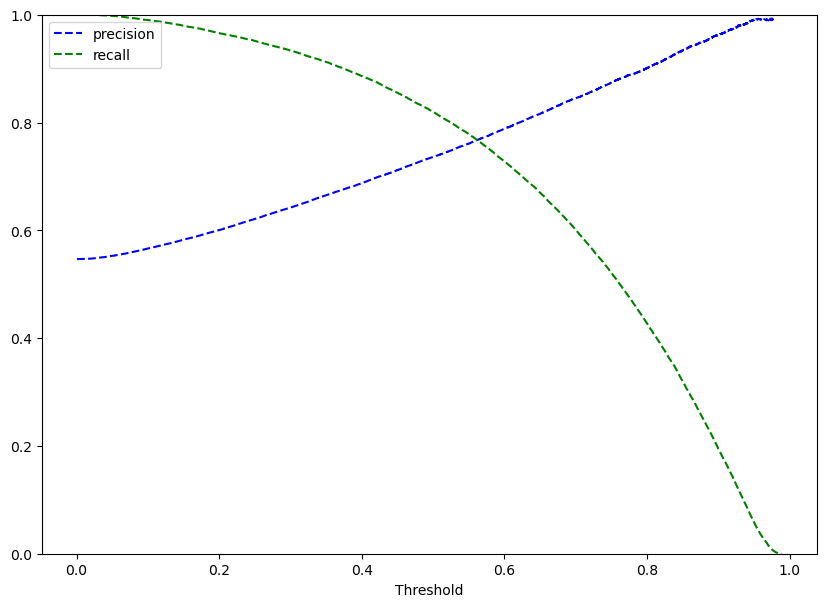

In [511]:
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [514]:
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.5615708465406387


              precision    recall  f1-score   support

           0       0.72      0.72      0.72     29950
           1       0.77      0.77      0.77     36115

    accuracy                           0.75     66065
   macro avg       0.74      0.74      0.74     66065
weighted avg       0.75      0.75      0.75     66065



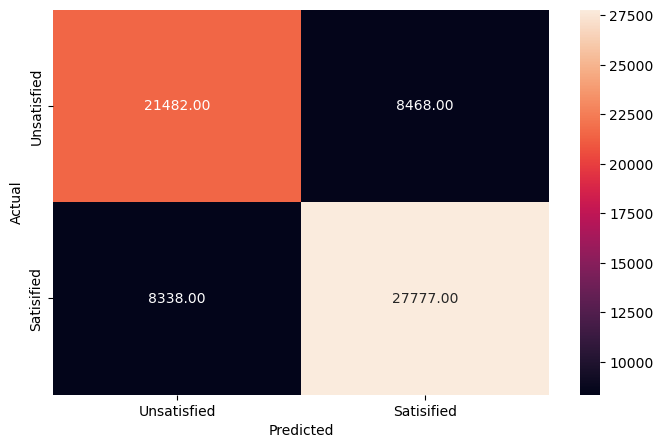

In [517]:
optimal_threshold=.56
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71     12836
           1       0.76      0.77      0.76     15478

    accuracy                           0.74     28314
   macro avg       0.74      0.74      0.74     28314
weighted avg       0.74      0.74      0.74     28314



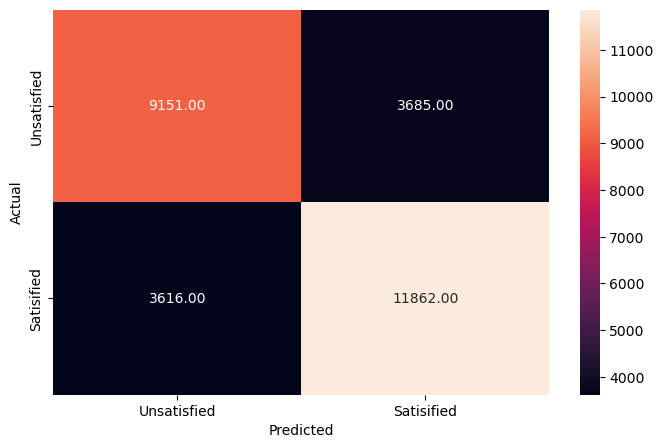

In [520]:
optimal_threshold1=.56
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

In [1281]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [1283]:
# Fitting SVM
svm = SVC(kernel = 'linear') # Linear kernel or linear decision boundary
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     29950
           1       0.85      0.84      0.85     36115

    accuracy                           0.84     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.84      0.84      0.84     66065



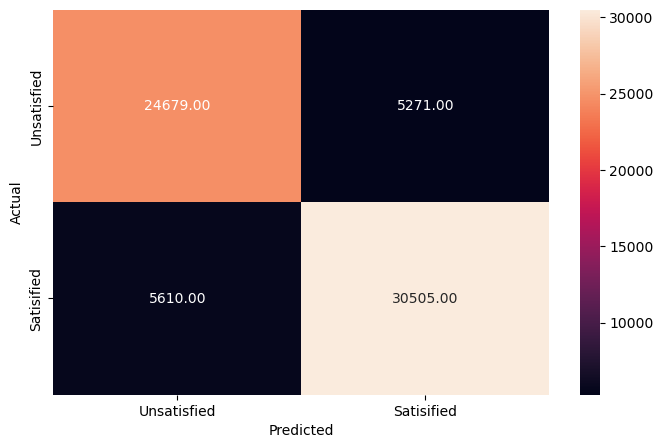

In [1284]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12836
           1       0.85      0.85      0.85     15478

    accuracy                           0.84     28314
   macro avg       0.84      0.84      0.84     28314
weighted avg       0.84      0.84      0.84     28314



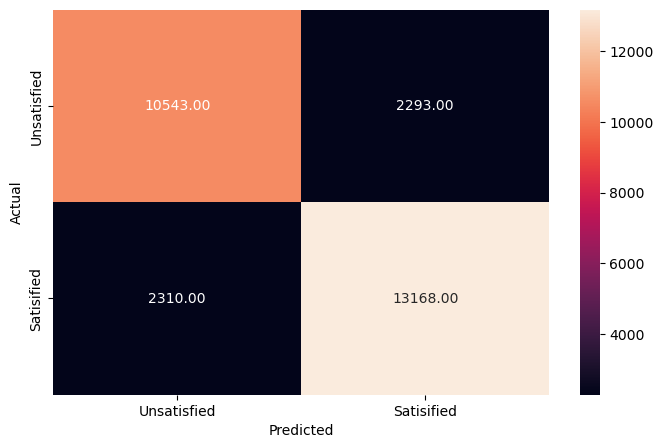

In [1285]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

In [1289]:
# Fitting SVM
svm_rbf = SVC(kernel = 'rbf') # Linear kernel or linear decision boundary
model = svm_rbf.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     29950
           1       0.93      0.95      0.94     36115

    accuracy                           0.94     66065
   macro avg       0.94      0.93      0.93     66065
weighted avg       0.94      0.94      0.94     66065



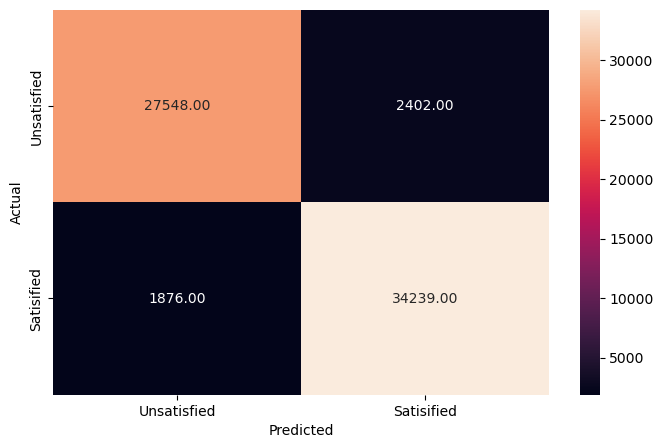

In [1290]:
y_pred_train_svm_rbf = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm_rbf)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     12836
           1       0.93      0.94      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



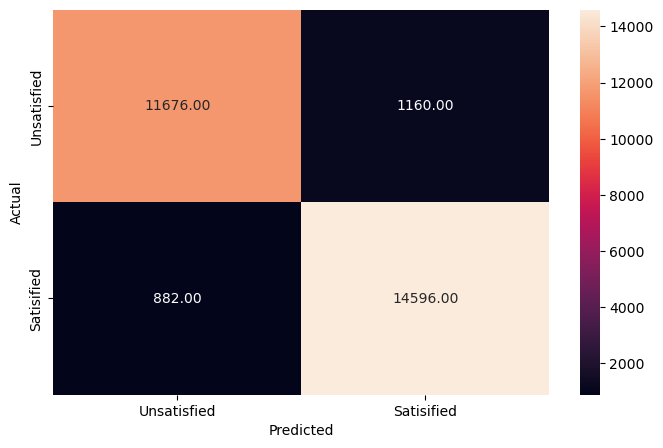

In [1293]:
y_pred_test_svm_rbf = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm_rbf)

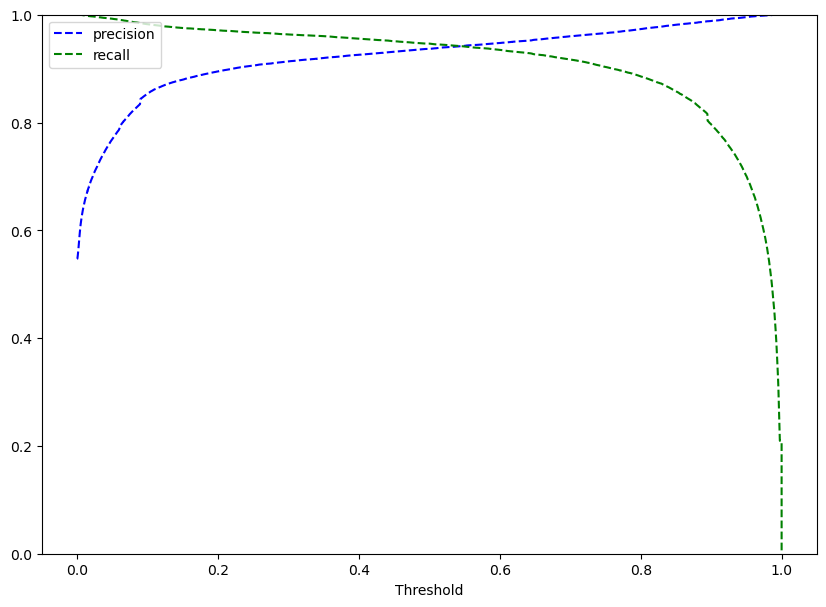

In [1295]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [1296]:
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.544644078894511


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     29950
           1       0.94      0.94      0.94     36115

    accuracy                           0.94     66065
   macro avg       0.94      0.94      0.94     66065
weighted avg       0.94      0.94      0.94     66065



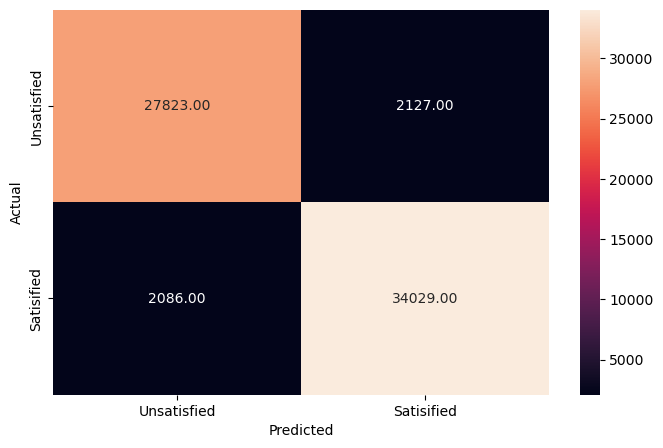

In [1299]:
optimal_threshold1=0.54
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12836
           1       0.93      0.94      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



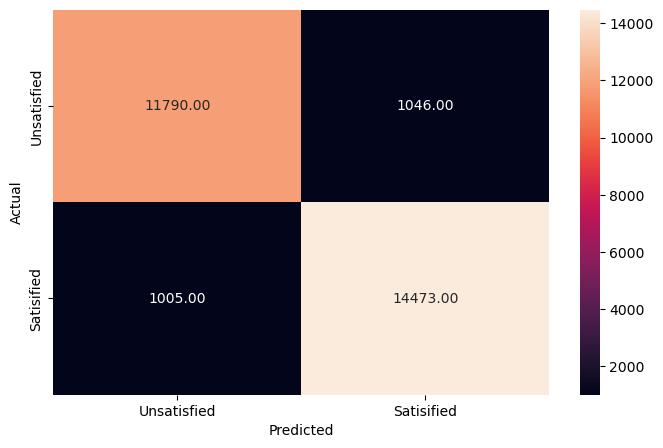

In [1300]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

In [1303]:
model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     29950
           1       0.92      0.93      0.93     36115

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



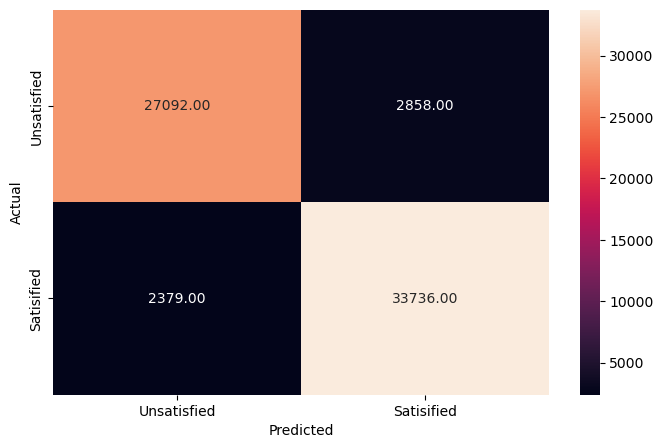

In [1305]:
pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12836
           1       0.91      0.93      0.92     15478

    accuracy                           0.92     28314
   macro avg       0.92      0.91      0.91     28314
weighted avg       0.92      0.92      0.91     28314



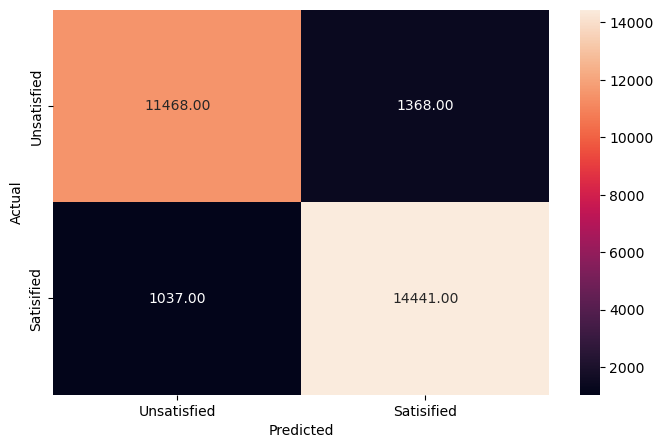

In [1307]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

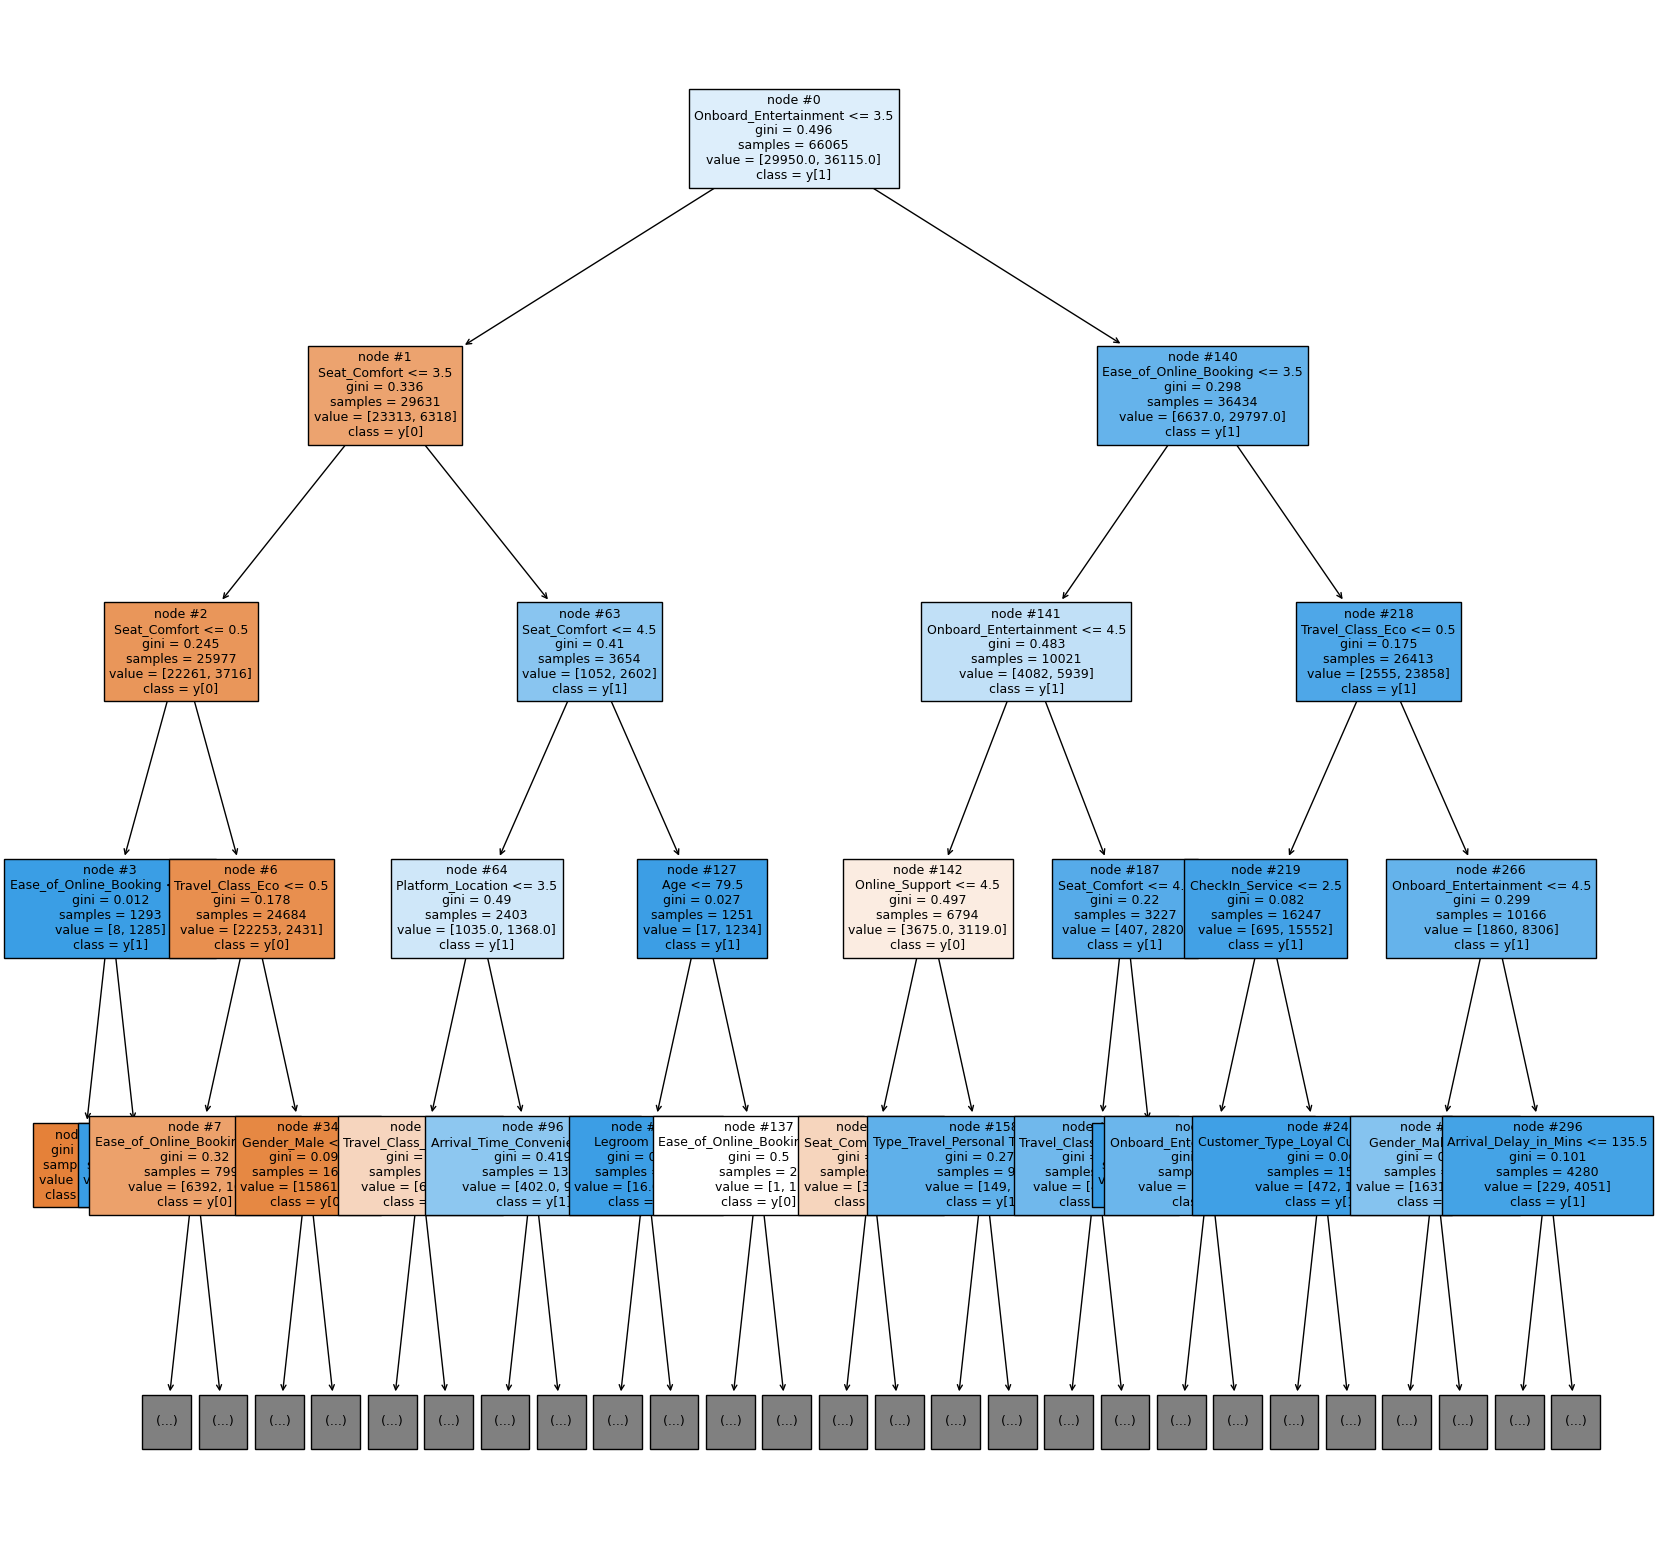

In [1309]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

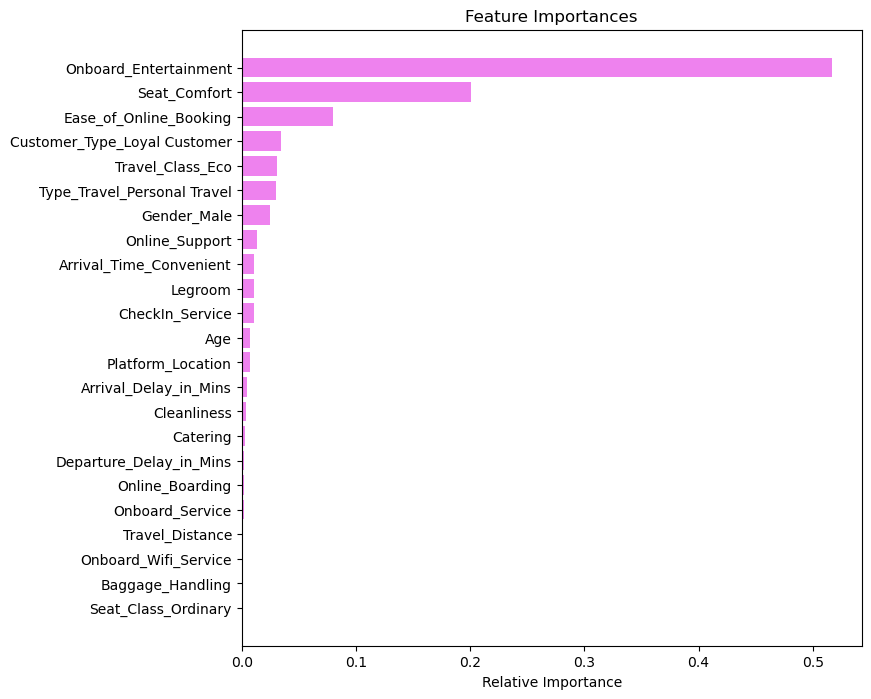

In [1311]:
feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [576]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['entropy',' gini'],            # Function to measure split quality
    'max_depth': [1,2,3,4,5,6,7,8,9,10,None],               # Maximum depth of the tree
    'min_samples_split': [2,3,4, 5, 6,7,8,9,10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1,2,3, 4,5, 6,7, 8],                # Minimum samples required to be a leaf node
}
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, 
                           scoring='accuracy' , cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=8, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', ' gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [581]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 7, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.96      0.97      0.96     29950
           1       0.97      0.97      0.97     36115

    accuracy                           0.97     66065
   macro avg       0.97      0.97      0.97     66065
weighted avg       0.97      0.97      0.97     66065



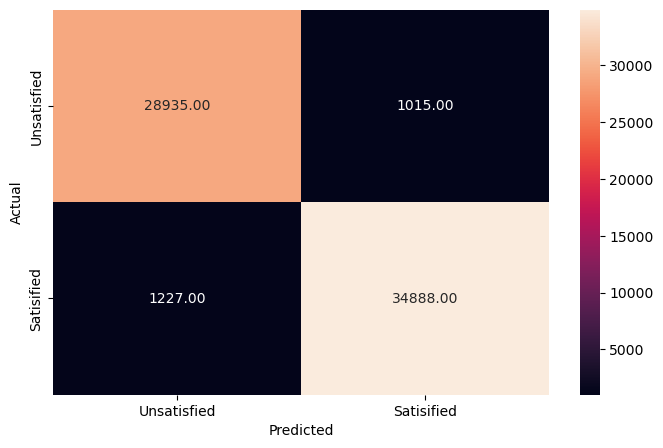

In [585]:
best_model_dt = grid_search.best_estimator_

pred_train_dt = best_model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12836
           1       0.94      0.94      0.94     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



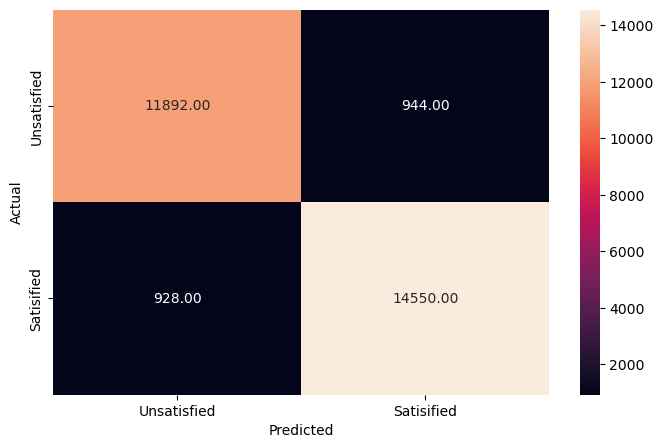

In [587]:
pred_test_dt = best_model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

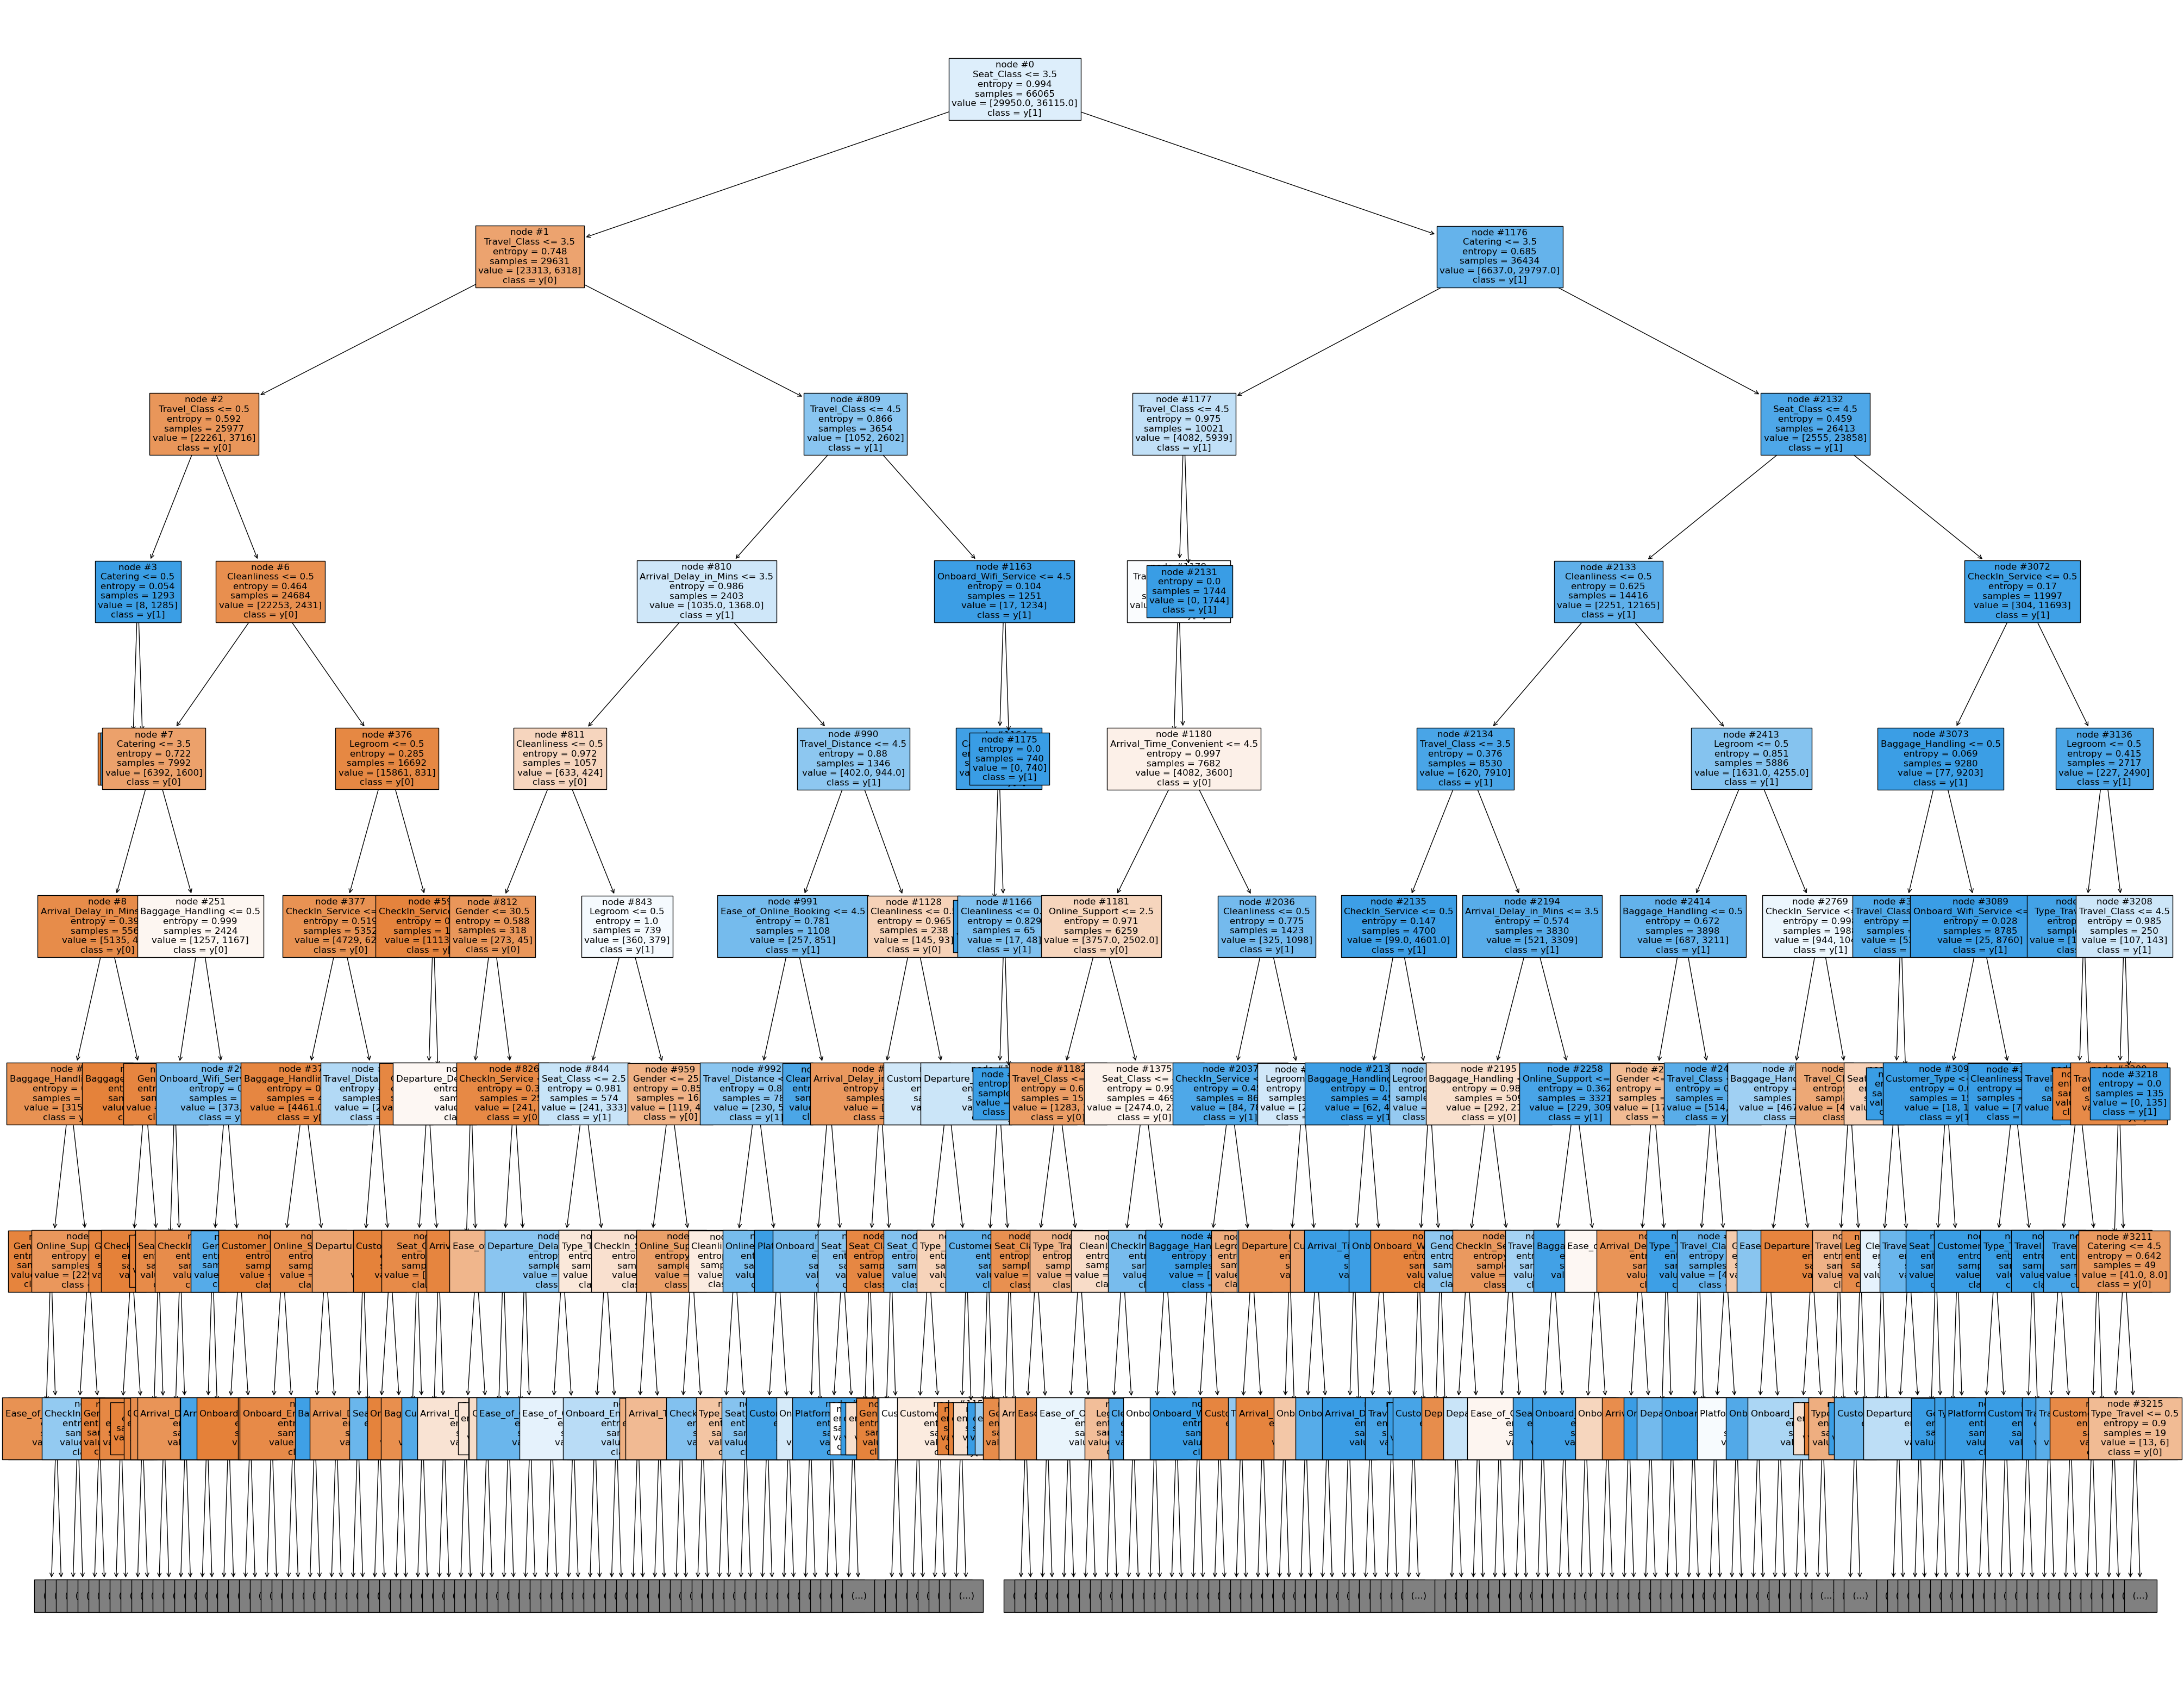

In [590]:
features = list(X.columns)

plt.figure(figsize = (50, 40))

tree.plot_tree(best_model_dt, max_depth = 8, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [1313]:
# Building the Random Forest model
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



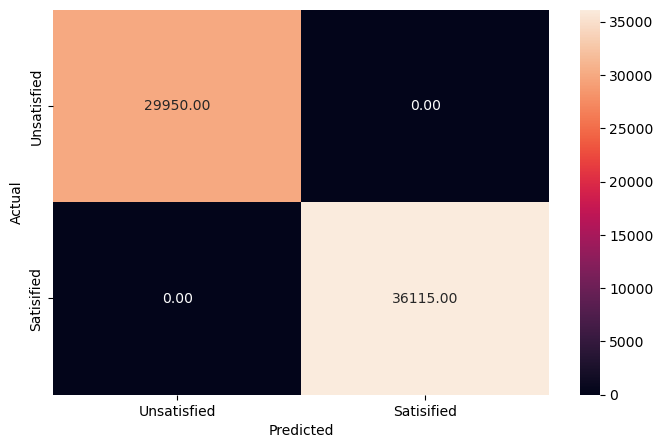

In [1314]:
pred_train_rf = rf.predict(X_train)

metrics_score(y_train, pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



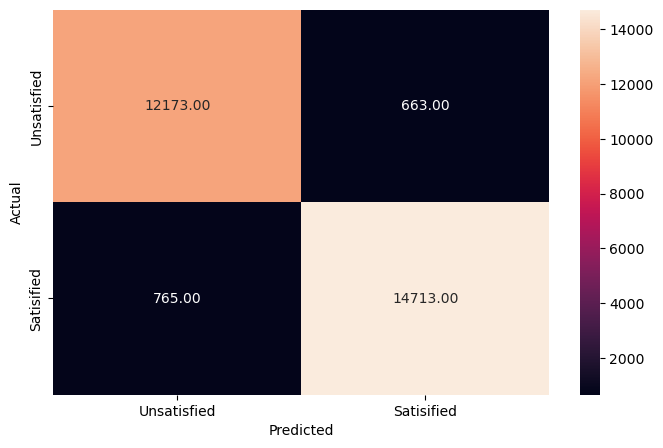

In [1317]:
pred_test_rf = rf.predict(X_test)

metrics_score(y_test, pred_test_rf)

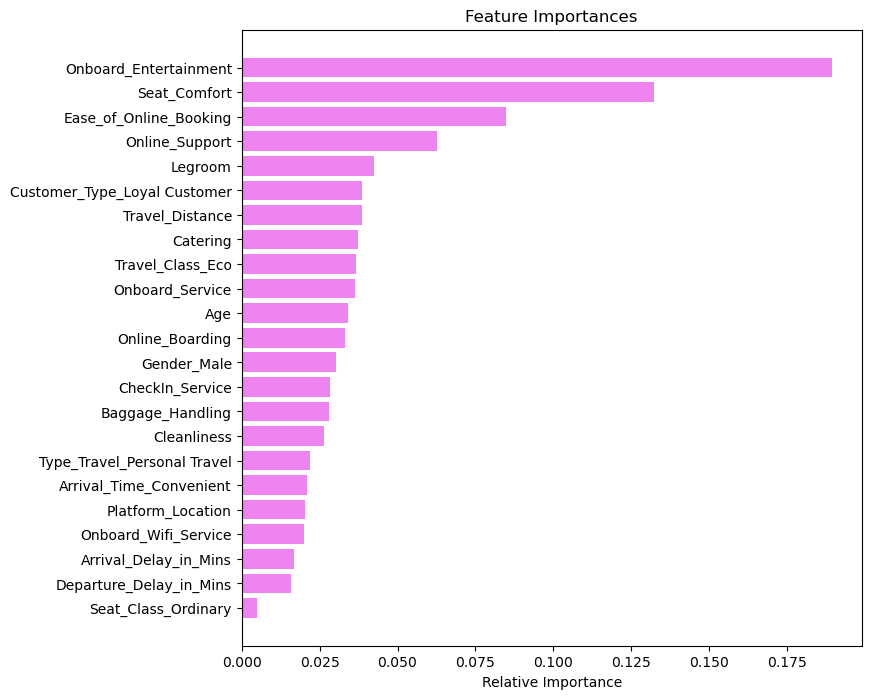

In [1319]:
feature_names = list(X_train.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [1333]:
param_grid = {
    'criterion': ['entropy',' gini'],            # Function to measure split quality
    'max_depth': [4,8,12, None],               # Maximum depth of the tree
    'min_samples_split': [2,3,5,10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1,2,3]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy' , cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['entropy', ' gini'],
                         'max_depth': [4, 8, 12, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='accuracy', verbose=1)

In [1335]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [1337]:
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [1339]:
y_pred_train_rf = best_model_rf.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



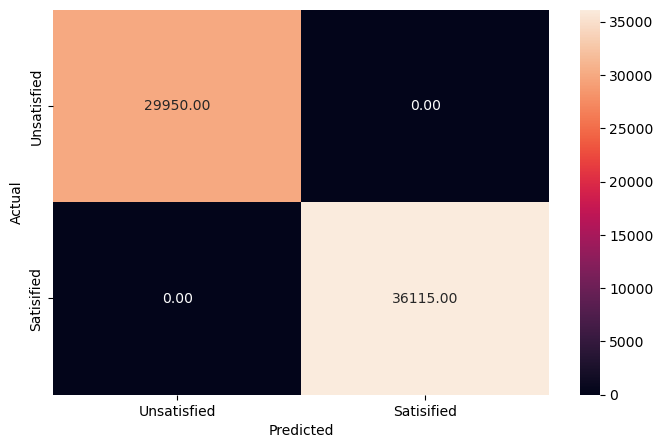

In [1341]:
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



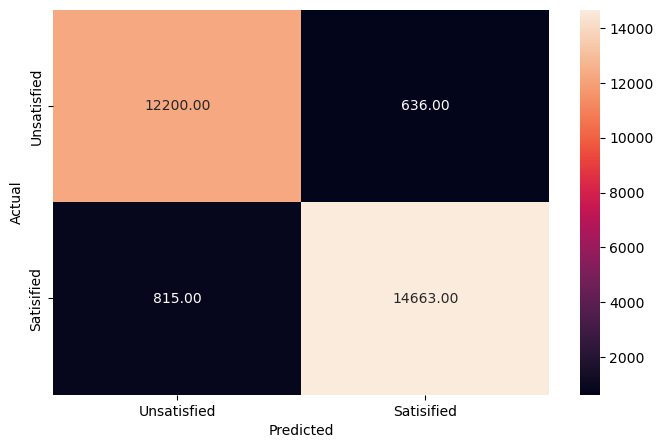

In [1343]:
metrics_score(y_test, y_pred_rf)

# Trying a CNN #

In [1355]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Seat_Comfort             94318 non-null  float64
 9   Seat_Class               94379 non-null  object 
 10  Arrival_Time_Convenient  85449 non-null  float64
 11  Catering                 85638 non-null  float64
 12  Platform_Location        94349 non-null  float64
 13  Onboard_Wifi_Service     94349 non-null  float64
 14  Onboard_Entertainment 

In [1357]:

# Fit and transform the train data
X[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']] = median_imputer.fit_transform(X[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']])

X.head()

Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  Female  Loyal Customer  52.0              NaN     Business   
1    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  Female  Loyal Customer  43.0  Business Travel     Business   
3  Female  Loyal Customer  44.0  Business Travel     Business   
4  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

   Seat_Comfort Seat_Class  ...  Onboard_Wifi_Service  Onboard_Entertainment  \
0           2.0  Green Car  ...                   4.0                    2.0   
1           1.0   Ordinary  ...                   4.0                    1.0   
2           2.0  Green Car  ...                   2.0                    4.0   
3           3.0   Ordinary  ...                   3.0                    2.0   
4           3.0   Ordinary  ...                   2.0                    4.0   

   Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
0             3.0                     2.0              2.0      3.0   
1             4.0                     4.0              5.0      2.0   
2             5.0                     5.0              5.0      5.0   
3             3.0                     3.0              3.0      3.0   
4             5.0                     4.0              4.0      4.0   

   Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  
0               2.0              4.0          2.0              1.0  
1               1.0              2.0          4.0              4.0  
2               5.0              4.0          5.0              5.0  
3               3.0              4.0          3.0              3.0  
4               4.0              4.0          4.0              4.0  

[5 rows x 23 columns]

In [1359]:
new_dummies = []
non_dummies = ["Age", "Travel_Distance", "Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"]
for c in X.columns:
    if c not in non_dummies:
        new_dummies.append(c)

new_dummies

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [1361]:
X[non_num_columns] = mode_imputer.fit_transform(X[non_num_columns])

In [1363]:
X[num_columns] = mode_imputer.fit_transform(X[num_columns])

In [1365]:
X.isna().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [1367]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  object 
 1   Customer_Type            94379 non-null  object 
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Arrival_Delay_in_Mins    94379 non-null  float64
 8   Seat_Comfort             94379 non-null  float64
 9   Seat_Class               94379 non-null  object 
 10  Arrival_Time_Convenient  94379 non-null  float64
 11  Catering                 94379 non-null  float64
 12  Platform_Location        94379 non-null  float64
 13  Onboard_Wifi_Service     94379 non-null  float64
 14  Onboard_Entertainment 

In [1369]:
new_dummies

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [1371]:

one_hot_data = pd.get_dummies(X, columns = new_dummies, dtype=int, drop_first=True)
#one_hot_data = one_hot_data.drop(columns=new_dummies)
one_hot_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           94379 non-null  float64
 1   Travel_Distance               94379 non-null  int64  
 2   Departure_Delay_in_Mins       94379 non-null  float64
 3   Arrival_Delay_in_Mins         94379 non-null  float64
 4   Gender_Male                   94379 non-null  int64  
 5   Customer_Type_Loyal Customer  94379 non-null  int64  
 6   Type_Travel_Personal Travel   94379 non-null  int64  
 7   Travel_Class_Eco              94379 non-null  int64  
 8   Seat_Comfort_1.0              94379 non-null  int64  
 9   Seat_Comfort_2.0              94379 non-null  int64  
 10  Seat_Comfort_3.0              94379 non-null  int64  
 11  Seat_Comfort_4.0              94379 non-null  int64  
 12  Seat_Comfort_5.0              94379 non-null  int64  
 13  S

In [1373]:
scaler = MinMaxScaler()

In [ ]:
features = 

In [1087]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 94379 entries, 0 to 94378
Series name: Overall_Experience
Non-Null Count  Dtype
--------------  -----
94379 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [1375]:
# Splitting the data
X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn=train_test_split(one_hot_data,y,test_size=0.3,random_state=42,stratify=y)

In [1377]:
X_train_cnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 5759 to 25552
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           66065 non-null  float64
 1   Travel_Distance               66065 non-null  int64  
 2   Departure_Delay_in_Mins       66065 non-null  float64
 3   Arrival_Delay_in_Mins         66065 non-null  float64
 4   Gender_Male                   66065 non-null  int64  
 5   Customer_Type_Loyal Customer  66065 non-null  int64  
 6   Type_Travel_Personal Travel   66065 non-null  int64  
 7   Travel_Class_Eco              66065 non-null  int64  
 8   Seat_Comfort_1.0              66065 non-null  int64  
 9   Seat_Comfort_2.0              66065 non-null  int64  
 10  Seat_Comfort_3.0              66065 non-null  int64  
 11  Seat_Comfort_4.0              66065 non-null  int64  
 12  Seat_Comfort_5.0              66065 non-null  int64  
 13

In [1380]:
X_train_normalized = scaler.fit_transform(X_train_cnn)

In [1382]:
X_test_normalized = scaler.transform(X_test_cnn)

In [1384]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [1386]:
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [1388]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(78,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
model_1.add(Dense(1, activation='sigmoid'))

In [1390]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │        10,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1392]:
history_1 = model_1.fit(X_train_normalized,
                    y_train_cnn,
                    validation_split=0.1,
                    epochs=150,
                    verbose=2)

Epoch 1/150
1859/1859 - 1s - 778us/step - accuracy: 0.8781 - loss: 0.2824 - val_accuracy: 0.9140 - val_loss: 0.2050
Epoch 2/150
1859/1859 - 1s - 560us/step - accuracy: 0.9152 - loss: 0.1987 - val_accuracy: 0.9313 - val_loss: 0.1655
Epoch 3/150
1859/1859 - 1s - 541us/step - accuracy: 0.9284 - loss: 0.1710 - val_accuracy: 0.9364 - val_loss: 0.1495
Epoch 4/150
1859/1859 - 1s - 525us/step - accuracy: 0.9349 - loss: 0.1550 - val_accuracy: 0.9398 - val_loss: 0.1401
Epoch 5/150
1859/1859 - 1s - 532us/step - accuracy: 0.9383 - loss: 0.1470 - val_accuracy: 0.9425 - val_loss: 0.1332
Epoch 6/150
1859/1859 - 1s - 541us/step - accuracy: 0.9411 - loss: 0.1388 - val_accuracy: 0.9454 - val_loss: 0.1292
Epoch 7/150
1859/1859 - 1s - 534us/step - accuracy: 0.9431 - loss: 0.1342 - val_accuracy: 0.9466 - val_loss: 0.1248
Epoch 8/150
1859/1859 - 1s - 529us/step - accuracy: 0.9446 - loss: 0.1292 - val_accuracy: 0.9487 - val_loss: 0.1205
Epoch 9/150
1859/1859 - 1s - 532us/step - accuracy: 0.9467 - loss: 0.125

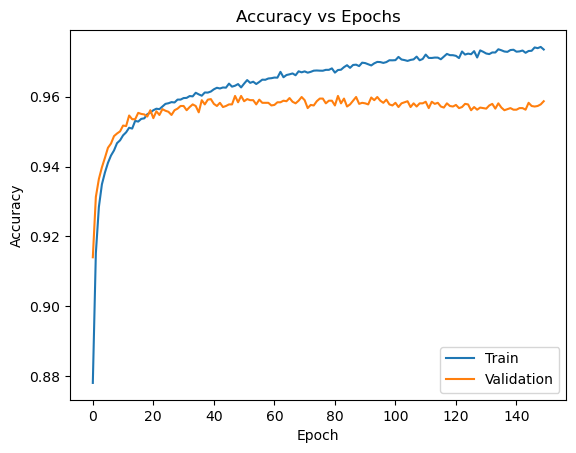

In [1394]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [1396]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [1398]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [1400]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(78,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [1402]:
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1404]:
history_2 = model_2.fit(X_train_normalized,
                    y_train_cnn,
                    validation_split=0.1,
                    epochs=100,
                    verbose=2)

Epoch 1/100
1859/1859 - 2s - 885us/step - accuracy: 0.8990 - loss: 0.2310 - val_accuracy: 0.9266 - val_loss: 0.1778
Epoch 2/100
1859/1859 - 1s - 587us/step - accuracy: 0.9273 - loss: 0.1717 - val_accuracy: 0.9416 - val_loss: 0.1476
Epoch 3/100
1859/1859 - 1s - 587us/step - accuracy: 0.9368 - loss: 0.1504 - val_accuracy: 0.9464 - val_loss: 0.1363
Epoch 4/100
1859/1859 - 1s - 614us/step - accuracy: 0.9410 - loss: 0.1402 - val_accuracy: 0.9478 - val_loss: 0.1273
Epoch 5/100
1859/1859 - 1s - 603us/step - accuracy: 0.9438 - loss: 0.1323 - val_accuracy: 0.9485 - val_loss: 0.1217
Epoch 6/100
1859/1859 - 1s - 606us/step - accuracy: 0.9444 - loss: 0.1284 - val_accuracy: 0.9501 - val_loss: 0.1172
Epoch 7/100
1859/1859 - 1s - 593us/step - accuracy: 0.9471 - loss: 0.1233 - val_accuracy: 0.9496 - val_loss: 0.1168
Epoch 8/100
1859/1859 - 1s - 593us/step - accuracy: 0.9471 - loss: 0.1204 - val_accuracy: 0.9479 - val_loss: 0.1138
Epoch 9/100
1859/1859 - 1s - 601us/step - accuracy: 0.9489 - loss: 0.119

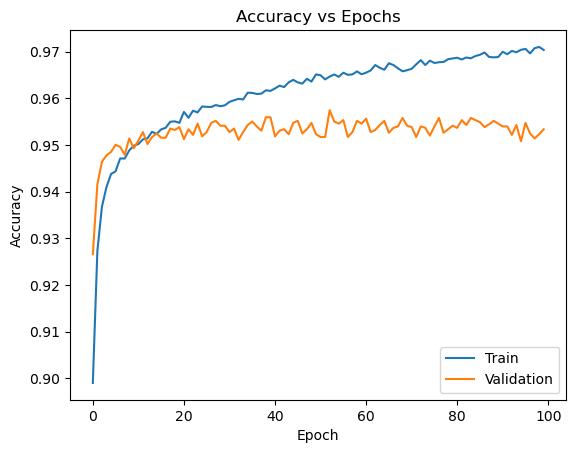

In [1406]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [1408]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [1410]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [1412]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(78,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [1414]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,489 (248.00 KB)

 Trainable params: 63,489 (248.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1416]:
history_3 = model_3.fit(X_train_normalized,
                    y_train_cnn,
                    validation_split=0.1,
                    epochs=150,
                    verbose=2)

Epoch 1/150
1859/1859 - 2s - 1ms/step - accuracy: 0.9022 - loss: 0.2243 - val_accuracy: 0.9281 - val_loss: 0.1726
Epoch 2/150
1859/1859 - 2s - 855us/step - accuracy: 0.9283 - loss: 0.1653 - val_accuracy: 0.9435 - val_loss: 0.1384
Epoch 3/150
1859/1859 - 2s - 841us/step - accuracy: 0.9383 - loss: 0.1443 - val_accuracy: 0.9454 - val_loss: 0.1321
Epoch 4/150
1859/1859 - 2s - 851us/step - accuracy: 0.9419 - loss: 0.1341 - val_accuracy: 0.9490 - val_loss: 0.1210
Epoch 5/150
1859/1859 - 2s - 877us/step - accuracy: 0.9454 - loss: 0.1270 - val_accuracy: 0.9499 - val_loss: 0.1173
Epoch 6/150
1859/1859 - 2s - 937us/step - accuracy: 0.9472 - loss: 0.1216 - val_accuracy: 0.9537 - val_loss: 0.1138
Epoch 7/150
1859/1859 - 2s - 949us/step - accuracy: 0.9492 - loss: 0.1183 - val_accuracy: 0.9496 - val_loss: 0.1160
Epoch 8/150
1859/1859 - 2s - 880us/step - accuracy: 0.9494 - loss: 0.1160 - val_accuracy: 0.9482 - val_loss: 0.1176
Epoch 9/150
1859/1859 - 2s - 989us/step - accuracy: 0.9508 - loss: 0.1128 

In [1418]:
model_3.evaluate(X_test_normalized, y_test_cnn, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.9508 - loss: 0.1475
885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step


In [1134]:
model_3.evaluate(X_test_normalized, y_test_cnn, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9509 - loss: 0.1527
885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step


In [1420]:
model_2.evaluate(X_test_normalized, y_test_cnn, verbose = 1)
test_pred = np.round(model_2.predict(X_test_normalized))

885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9521 - loss: 0.1332
885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step


In [1422]:
model_1.evaluate(X_test_normalized, y_test_cnn, verbose = 1)
test_pred = np.round(model_1.predict(X_test_normalized))

885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9514 - loss: 0.1351
885/885 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8557
           1       0.96      0.95      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



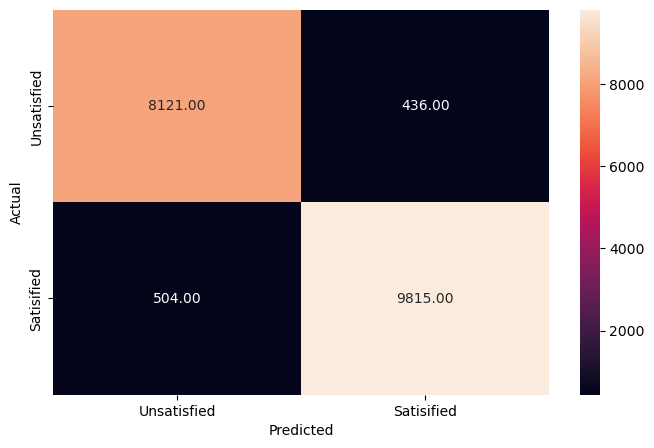

In [803]:
metrics_score(y_test_cnn, test_pred)

# Treating the Final Test Data to make it compatible with the CNN Model #

In [1424]:
travel_data_test = pd.read_csv("Traveldata_test.csv")

In [1426]:
travel_data_test.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              532                      0.0                    0.0  
1             1425                      9.0                   28.0  
2             2832                      0.0                    0.0  
3             1352                      0.0                    0.0  
4             1610                     17.0                    0.0

In [1428]:
survey_data_test = pd.read_csv("Surveydata_test.csv")
survey_data_test.head()

ID    Seat_Comfort Seat_Class Arrival_Time_Convenient    Catering  \
0  99900001      Acceptable  Green Car              Acceptable  Acceptable   
1  99900002  Extremely Poor   Ordinary                    Good        Poor   
2  99900003       Excellent   Ordinary               Excellent   Excellent   
3  99900004      Acceptable  Green Car               Excellent  Acceptable   
4  99900005       Excellent   Ordinary          Extremely Poor   Excellent   

   Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0         Manageable    Needs Improvement             Excellent   
1         Manageable           Acceptable                  Poor   
2    Very Convenient            Excellent             Excellent   
3    Very Convenient                 Poor            Acceptable   
4  Needs Improvement            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0          Excellent            Good          Excellent            Poor  
1               Good      Acceptable          Excellent      Acceptable  
2  Needs Improvement            Good  Needs Improvement       Excellent  
3          Excellent       Excellent          Excellent            Poor  
4          Excellent       Excellent          Excellent       Excellent

In [1430]:
sample = pd.read_csv("Sample_Submission.csv")

In [1432]:
sample.head()

ID  Overall_Experience
0  99900001                   1
1  99900002                   0
2  99900003                   0
3  99900004                   0
4  99900005                   1

In [1434]:
train_data_test = pd.merge(travel_data_test, survey_data_test, on="ID")

In [1436]:
train_data_test.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              532                      0.0                    0.0   
1             1425                      9.0                   28.0   
2             2832                      0.0                    0.0   
3             1352                      0.0                    0.0   
4             1610                     17.0                    0.0   

     Seat_Comfort  ... Onboard_Wifi_Service Onboard_Entertainment  \
0      Acceptable  ...    Needs Improvement             Excellent   
1  Extremely Poor  ...           Acceptable                  Poor   
2       Excellent  ...            Excellent             Excellent   
3      Acceptable  ...                 Poor            Acceptable   
4       Excellent  ...            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0          Excellent            Good          Excellent            Poor  
1               Good      Acceptable          Excellent      Acceptable  
2  Needs Improvement            Good  Needs Improvement       Excellent  
3          Excellent       Excellent          Excellent            Poor  
4          Excellent       Excellent          Excellent       Excellent  

[5 rows x 24 columns]

In [1438]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  float64
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  float64
 13  Catering                 85638 non-null  float64
 14  Platform_Location     

In [1440]:
train_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [1442]:
for c in train_data_test.columns:
    if not ptypes.is_numeric_dtype(train_data_test[c]):
        #print(train_data[c].value_counts())
        train_data_test[c].replace("Extremely Poor", 0, inplace=True)
        train_data_test[c].replace("Poor", 1, inplace=True)
        train_data_test[c].replace("Needs Improvement", 2, inplace=True)
        train_data_test[c].replace("Acceptable", 3, inplace=True)
        train_data_test[c].replace("Good", 4, inplace=True)
        train_data_test[c].replace("Excellent", 5, inplace=True)

In [1444]:
train_data_test["Platform_Location"].replace("Very Inconvenient", 0, inplace=True)
train_data_test["Platform_Location"].replace("Inconvenient", 1, inplace=True)
train_data_test["Platform_Location"].replace("Needs Improvement", 2, inplace=True)
train_data_test["Platform_Location"].replace("Manageable", 3, inplace=True)
train_data_test["Platform_Location"].replace("Convenient", 4, inplace=True)
train_data_test["Platform_Location"].replace("Very Convenient", 5, inplace=True)

In [1446]:
train_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  float64
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  float64
 12  Catering                 32245 non-null  float64
 13  Platform_Location        35590 non-null  float64
 14  Onboard_Wifi_Service  

In [1448]:
train_data_test.isna().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [1450]:
# Fit and transform the train data
train_data_test[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']] = median_imputer.fit_transform(train_data_test[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']])

train_data_test.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              532                      0.0                    0.0   
1             1425                      9.0                   28.0   
2             2832                      0.0                    0.0   
3             1352                      0.0                    0.0   
4             1610                     17.0                    0.0   

   Seat_Comfort  ... Onboard_Wifi_Service  Onboard_Entertainment  \
0           3.0  ...                  2.0                    5.0   
1           0.0  ...                  3.0                    1.0   
2           5.0  ...                  5.0                    5.0   
3           3.0  ...                  1.0                    3.0   
4           5.0  ...                  5.0                    5.0   

   Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
0             4.0                     5.0              5.0      5.0   
1             3.0                     3.0              5.0      3.0   
2             5.0                     2.0              2.0      2.0   
3             5.0                     1.0              3.0      2.0   
4             5.0                     5.0              NaN      3.0   

   Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  
0               5.0              4.0          5.0              1.0  
1               4.0              3.0          5.0              3.0  
2               2.0              4.0          2.0              5.0  
3               5.0              5.0          5.0              1.0  
4               5.0              5.0          5.0              5.0  

[5 rows x 24 columns]

In [1452]:
new_dummies = []
non_dummies = ["ID", "Age", "Travel_Distance", "Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"]
for c in train_data_test.columns:
    if c not in non_dummies:
        new_dummies.append(c)

new_dummies

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [1454]:
train_data_test[non_num_columns] = mode_imputer.fit_transform(train_data_test[non_num_columns])

In [1456]:
train_data_test[num_columns] = mode_imputer.fit_transform(train_data_test[num_columns])

In [1458]:
train_data_test.isna().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [1460]:
# Creating one hot encoding for the column - University Rating and then dropping University Rating
one_hot_data = pd.get_dummies(train_data_test.drop(["ID"], axis=1), columns = new_dummies, dtype=int, drop_first=True)
#one_hot_data = one_hot_data.drop(columns=new_dummies)
one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           35602 non-null  float64
 1   Travel_Distance               35602 non-null  int64  
 2   Departure_Delay_in_Mins       35602 non-null  float64
 3   Arrival_Delay_in_Mins         35602 non-null  float64
 4   Gender_Male                   35602 non-null  int64  
 5   Customer_Type_Loyal Customer  35602 non-null  int64  
 6   Type_Travel_Personal Travel   35602 non-null  int64  
 7   Travel_Class_Eco              35602 non-null  int64  
 8   Seat_Comfort_1.0              35602 non-null  int64  
 9   Seat_Comfort_2.0              35602 non-null  int64  
 10  Seat_Comfort_3.0              35602 non-null  int64  
 11  Seat_Comfort_4.0              35602 non-null  int64  
 12  Seat_Comfort_5.0              35602 non-null  int64  
 13  S

In [1462]:
one_hot_data.insert(24, 'Platform_Location_1.0', 0)

In [1464]:
one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           35602 non-null  float64
 1   Travel_Distance               35602 non-null  int64  
 2   Departure_Delay_in_Mins       35602 non-null  float64
 3   Arrival_Delay_in_Mins         35602 non-null  float64
 4   Gender_Male                   35602 non-null  int64  
 5   Customer_Type_Loyal Customer  35602 non-null  int64  
 6   Type_Travel_Personal Travel   35602 non-null  int64  
 7   Travel_Class_Eco              35602 non-null  int64  
 8   Seat_Comfort_1.0              35602 non-null  int64  
 9   Seat_Comfort_2.0              35602 non-null  int64  
 10  Seat_Comfort_3.0              35602 non-null  int64  
 11  Seat_Comfort_4.0              35602 non-null  int64  
 12  Seat_Comfort_5.0              35602 non-null  int64  
 13  S

In [1466]:
one_hot_data.insert(39, 'Online_Support_1.0', 0)

In [1468]:
one_hot_data.insert(49, 'Onboard_Service_1.0', 0)

In [1470]:
one_hot_data.insert(59, 'Baggage_Handling_1.0', 0)

In [1472]:
one_hot_data.insert(68, 'Cleanliness_1.0', 0)

In [1474]:
test_normalized = scaler.fit_transform(one_hot_data)

In [1515]:
final_pred_model1 = np.round(model_1.predict(test_normalized))

1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


In [1516]:
final_pred_model2 = np.round(model_2.predict(test_normalized))

1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


In [1518]:
final_pred_model3 = np.round(model_3.predict(test_normalized))

1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


In [1521]:
def format_array(final_pred):
    final_array = []
    for i in final_pred:
        final_array.append(i[0])
    return final_array


In [1524]:
final_df = pd.DataFrame({'ID': train_data_test['ID'], 'model1': format_array(final_pred_model1)})

In [1526]:
final_df

ID  model1
0      99900001     1.0
1      99900002     1.0
2      99900003     1.0
3      99900004     0.0
4      99900005     1.0
...         ...     ...
35597  99935598     0.0
35598  99935599     1.0
35599  99935600     0.0
35600  99935601     1.0
35601  99935602     0.0

[35602 rows x 2 columns]

In [1489]:
final_df["Overall_Experience"] = final_df["model1"].astype(int)

In [1491]:
final_df

ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   1
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [1532]:
final_df['model2'] = format_array(final_pred_model2)

In [1536]:
final_df['model3'] = format_array(final_pred_model3)

In [1538]:
final_df

ID  model1  model2  model3
0      99900001     1.0     1.0     1.0
1      99900002     1.0     1.0     1.0
2      99900003     1.0     1.0     1.0
3      99900004     0.0     0.0     0.0
4      99900005     1.0     1.0     1.0
...         ...     ...     ...     ...
35597  99935598     0.0     0.0     0.0
35598  99935599     1.0     1.0     1.0
35599  99935600     0.0     1.0     0.0
35600  99935601     1.0     1.0     1.0
35601  99935602     0.0     0.0     0.0

[35602 rows x 4 columns]

In [1493]:
final_df.to_csv("hackaton_submission-12.csv", index=False)

# Treating the Final Test Data to make it compatible with the Tree models #

In [1496]:
train_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  float64
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  35602 non-null  float64
 12  Catering                 35602 non-null  float64
 13  Platform_Location        35602 non-null  float64
 14  Onboard_Wifi_Service  

In [1498]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           66065 non-null  float64
 1   Travel_Distance               66065 non-null  int64  
 2   Departure_Delay_in_Mins       66065 non-null  float64
 3   Arrival_Delay_in_Mins         66065 non-null  float64
 4   Seat_Comfort                  66065 non-null  float64
 5   Arrival_Time_Convenient       66065 non-null  float64
 6   Catering                      66065 non-null  float64
 7   Platform_Location             66065 non-null  float64
 8   Onboard_Wifi_Service          66065 non-null  float64
 9   Onboard_Entertainment         66065 non-null  float64
 10  Online_Support                66065 non-null  float64
 11  Ease_of_Online_Booking        66065 non-null  float64
 12  Onboard_Service               66065 non-null  float64
 1

In [1500]:
X_dt = pd.get_dummies(train_data_test.drop(["ID"], axis=1), drop_first=True, columns = dummy_columns)

In [1502]:
X_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           35602 non-null  float64
 1   Travel_Distance               35602 non-null  int64  
 2   Departure_Delay_in_Mins       35602 non-null  float64
 3   Arrival_Delay_in_Mins         35602 non-null  float64
 4   Seat_Comfort                  35602 non-null  float64
 5   Arrival_Time_Convenient       35602 non-null  float64
 6   Catering                      35602 non-null  float64
 7   Platform_Location             35602 non-null  float64
 8   Onboard_Wifi_Service          35602 non-null  float64
 9   Onboard_Entertainment         35602 non-null  float64
 10  Online_Support                35602 non-null  float64
 11  Ease_of_Online_Booking        35602 non-null  float64
 12  Onboard_Service               35602 non-null  float64
 13  L

In [1540]:
pred_rf = best_model_rf.predict(X_dt)

In [1542]:
pred_rf

array([1, 1, 1, ..., 1, 1, 0])

In [1544]:
final_df['model4'] = pred_rf

In [1546]:
final_df

ID  model1  model2  model3  model4
0      99900001     1.0     1.0     1.0       1
1      99900002     1.0     1.0     1.0       1
2      99900003     1.0     1.0     1.0       1
3      99900004     0.0     0.0     0.0       0
4      99900005     1.0     1.0     1.0       1
...         ...     ...     ...     ...     ...
35597  99935598     0.0     0.0     0.0       0
35598  99935599     1.0     1.0     1.0       1
35599  99935600     0.0     1.0     0.0       1
35600  99935601     1.0     1.0     1.0       1
35601  99935602     0.0     0.0     0.0       0

[35602 rows x 5 columns]

In [1508]:
final_df = pd.DataFrame({'ID': train_data_test['ID'], 'Overall_Experience': pred_rf})

In [1510]:
final_df

ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   1
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [1512]:
final_df.to_csv("hackaton_submission-13.csv", index=False)

In [1012]:
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

In [1015]:
grid_search2 = GridSearchCV(estimator=rf, param_grid=parameters, 
                           scoring='accuracy' , cv=5, n_jobs=-1, verbose=1)
grid_search2.fit(X_train, y_train)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'max_leaf_nodes': [50, 75, 150, 250],
                         'min_samples_split': [10, 30, 50, 70]},
             scoring='accuracy', verbose=1)

In [1017]:
best_model_rf2 = grid_search2.best_estimator_
y_pred_rf2 = best_model_rf2.predict(X_test)

In [1028]:
print("Best Parameters:", grid_search2.best_params_)

Best Parameters: {'max_depth': 21, 'max_leaf_nodes': 250, 'min_samples_split': 50}


              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12836
           1       0.93      0.94      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



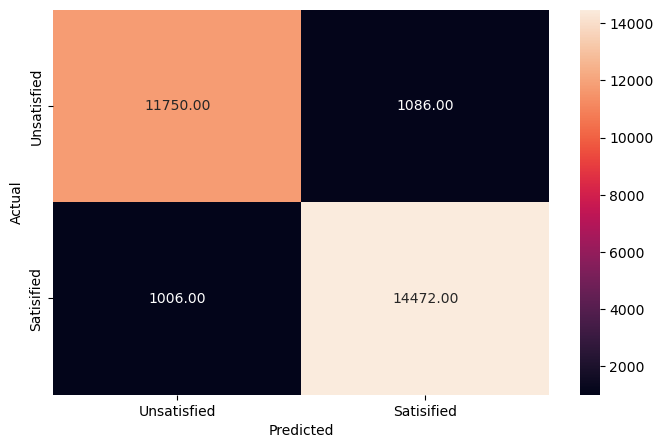

In [1019]:
metrics_score(y_test, y_pred_rf2)

In [1022]:
pred_rf2 = best_model_rf2.predict(X_dt)
final_df = pd.DataFrame({'ID': train_data_test['ID'], 'Overall_Experience': pred_rf2})
final_df

ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   0
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [1024]:
final_df.to_csv("hackaton_submission-4.csv", index=False)

In [1030]:
parameters = {
    'criterion': ['entropy',' gini'],            # Function to measure split quality
    'max_depth': [5,6,7,8,9,10,20, None],               # Maximum depth of the tree
    'min_samples_split': [2,3,4, 5, 6,7,8,9,10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1,2,3, 4,5, 6,7, 8],                # Minimum samples required to be a leaf node
}

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7}
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



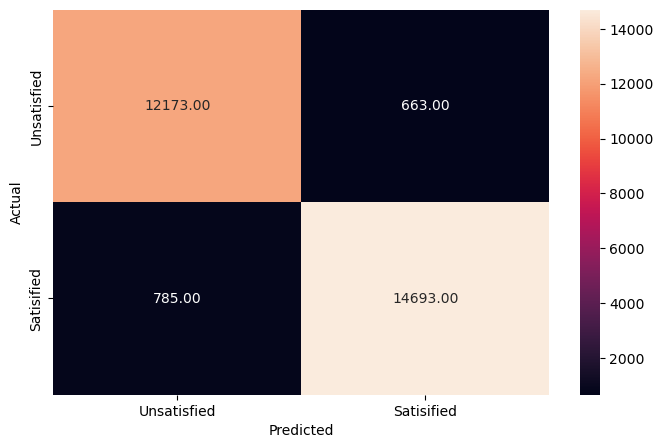

In [1032]:
grid_search3 = GridSearchCV(estimator=rf, param_grid=parameters, 
                           scoring='f1' , cv=5, n_jobs=-1, verbose=1)
grid_search3.fit(X_train, y_train)
best_model_rf3 = grid_search3.best_estimator_
y_pred_rf3 = best_model_rf3.predict(X_test)
print("Best Parameters:", grid_search3.best_params_)
metrics_score(y_test, y_pred_rf3)

In [1037]:
pred_rf3 = best_model_rf3.predict(X_dt)
final_df = pd.DataFrame({'ID': train_data_test['ID'], 'Overall_Experience': pred_rf3})
final_df

ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   0
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [1039]:
final_df.to_csv("hackaton_submission-5.csv", index=False)

In [1550]:
y_pred_test2 = svm_rbf.predict_proba(scaling.transform(X_dt))

result = y_pred_test2[:,1]>optimal_threshold1

In [1552]:
result

array([ True,  True,  True, ..., False,  True, False])

In [1554]:
final_df

ID  model1  model2  model3  model4
0      99900001     1.0     1.0     1.0       1
1      99900002     1.0     1.0     1.0       1
2      99900003     1.0     1.0     1.0       1
3      99900004     0.0     0.0     0.0       0
4      99900005     1.0     1.0     1.0       1
...         ...     ...     ...     ...     ...
35597  99935598     0.0     0.0     0.0       0
35598  99935599     1.0     1.0     1.0       1
35599  99935600     0.0     1.0     0.0       1
35600  99935601     1.0     1.0     1.0       1
35601  99935602     0.0     0.0     0.0       0

[35602 rows x 5 columns]

In [1049]:
result = y_pred_test2[:,1]>optimal_threshold1

In [1556]:
final_df['model5'] = result.astype(int)

In [1558]:
final_df

ID  model1  model2  model3  model4  model5
0      99900001     1.0     1.0     1.0       1       1
1      99900002     1.0     1.0     1.0       1       1
2      99900003     1.0     1.0     1.0       1       1
3      99900004     0.0     0.0     0.0       0       0
4      99900005     1.0     1.0     1.0       1       1
...         ...     ...     ...     ...     ...     ...
35597  99935598     0.0     0.0     0.0       0       0
35598  99935599     1.0     1.0     1.0       1       1
35599  99935600     0.0     1.0     0.0       1       0
35600  99935601     1.0     1.0     1.0       1       1
35601  99935602     0.0     0.0     0.0       0       0

[35602 rows x 6 columns]

In [1059]:
final_df = pd.DataFrame({'ID': train_data_test['ID'], 'Overall_Experience': result.astype(int)})
final_df

ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   0
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [1061]:
final_df.to_csv("hackaton_submission-6.csv", index=False)

In [1170]:
pred_dt = best_model_dt.predict(X_dt)
final_df = pd.DataFrame({'ID': train_data_test['ID'], 'Overall_Experience': pred_dt})
final_df


ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   0
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [1172]:
final_df.to_csv("hackaton_submission-8.csv", index=False)

In [1572]:
final_df['Overall_Experience'] = final_df.apply(lambda row: 1 if (row['model2'] + row['model4'] + row['model5'])/3 >= 0.4 else 0 , axis=1)

In [1574]:
final_df

ID  model1  model2  model3  model4  model5  Overall_Experience
0      99900001     1.0     1.0     1.0       1       1                   1
1      99900002     1.0     1.0     1.0       1       1                   1
2      99900003     1.0     1.0     1.0       1       1                   1
3      99900004     0.0     0.0     0.0       0       0                   0
4      99900005     1.0     1.0     1.0       1       1                   1
...         ...     ...     ...     ...     ...     ...                 ...
35597  99935598     0.0     0.0     0.0       0       0                   0
35598  99935599     1.0     1.0     1.0       1       1                   1
35599  99935600     0.0     1.0     0.0       1       0                   1
35600  99935601     1.0     1.0     1.0       1       1                   1
35601  99935602     0.0     0.0     0.0       0       0                   0

[35602 rows x 7 columns]

In [1576]:
last_df = final_df.drop(['model1', 'model2', 'model3', 'model4', 'model5'], axis=1)

In [1578]:
last_df.to_csv("hackaton_submission-15.csv", index=False)